<a href="https://colab.research.google.com/github/wonseokb/Genat4_Study/blob/main/PSD_Qtail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Random Forests

### Can we predict the quartz content of sand, at any point on Earth?

## Decision Trees

Decision trees are intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. Decision Trees are powerful algorithms, capable of fitting (and overfitting!) complex datasets. Decision Trees are also the fundamental components of Random Forests, which are among the most powerful algorithms available today.

The first part of this notebook is based on the book ["Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow"](https://github.com/ageron/handson-ml3), by Aurélien Géron.

###1. Data

In [1]:
import numpy as np

# Load the csv data into a numpy array

# Sr90 = np.loadtxt("data_array_Sr90_5000.csv", delimiter=",", skiprows=1)
# Cs137 = np.loadtxt("data_array_Cs137_5000.csv", delimiter=",", skiprows=1)
# Bi207 = np.loadtxt("data_array_Bi207_5000.csv", delimiter=",", skiprows=1)

# Sr90 = np.loadtxt("data_array_Bi207_20000.csv", delimiter=",", skiprows=1)
# Cs137 = np.loadtxt("data_array_Cs137_20000.csv", delimiter=",", skiprows=1)
# Bi207 = np.loadtxt("data_array_Sr90_20000.csv", delimiter=",", skiprows=1)

Sr90 = np.loadtxt("data_array_Sr90_25cols_20000_try2.csv", delimiter=",", skiprows=1)
Cs137 = np.loadtxt("data_array_Cs137_25cols_20000_try2.csv", delimiter=",", skiprows=1)
Bi207 = np.loadtxt("data_array_Bi207_25cols_20000_try2.csv", delimiter=",", skiprows=1)


# Print the resulting numpy array
print(Sr90)
print(Sr90.shape)
print(Cs137)
print(Cs137.shape)
print(Bi207)
print(Bi207.shape)

[[ -31.4617     -454.07778459   11.29972    ...    2.64491785
     3.10808017    2.72521121]
 [ -50.1334     -661.38594578   10.124982   ...    4.10592594
     4.27940347    3.60493375]
 [ -29.2227     -382.21057544    9.97505    ...    2.14285937
     2.45445843    2.31553467]
 ...
 [ -43.3764     -571.76110089   10.05028    ...    3.6478747
     3.581839      3.45194608]
 [ -17.9878     -254.36496977   10.25       ...    1.6390754
     1.361553      1.24471686]
 [ -36.9793     -482.67716997    9.95013    ...    2.77127801
     2.82274693    2.94826325]]
(20000, 25)
[[ -23.1455     -296.41131602    9.57501    ...    2.64491785
     3.10808017    2.72521121]
 [ -18.3876     -266.44078304   10.225      ...    4.10592594
     4.27940347    3.60493375]
 [ -22.6657     -297.62375755   10.19999    ...    2.14285937
     2.45445843    2.31553467]
 ...
 [ -20.1468     -291.71335239   11.000078   ...    3.6478747
     3.581839      3.45194608]
 [ -31.2219     -399.38350958    9.80004    ...   

###2. Plots

Minimum value of the array: -161.883
Maximum value of the array: -14.3094


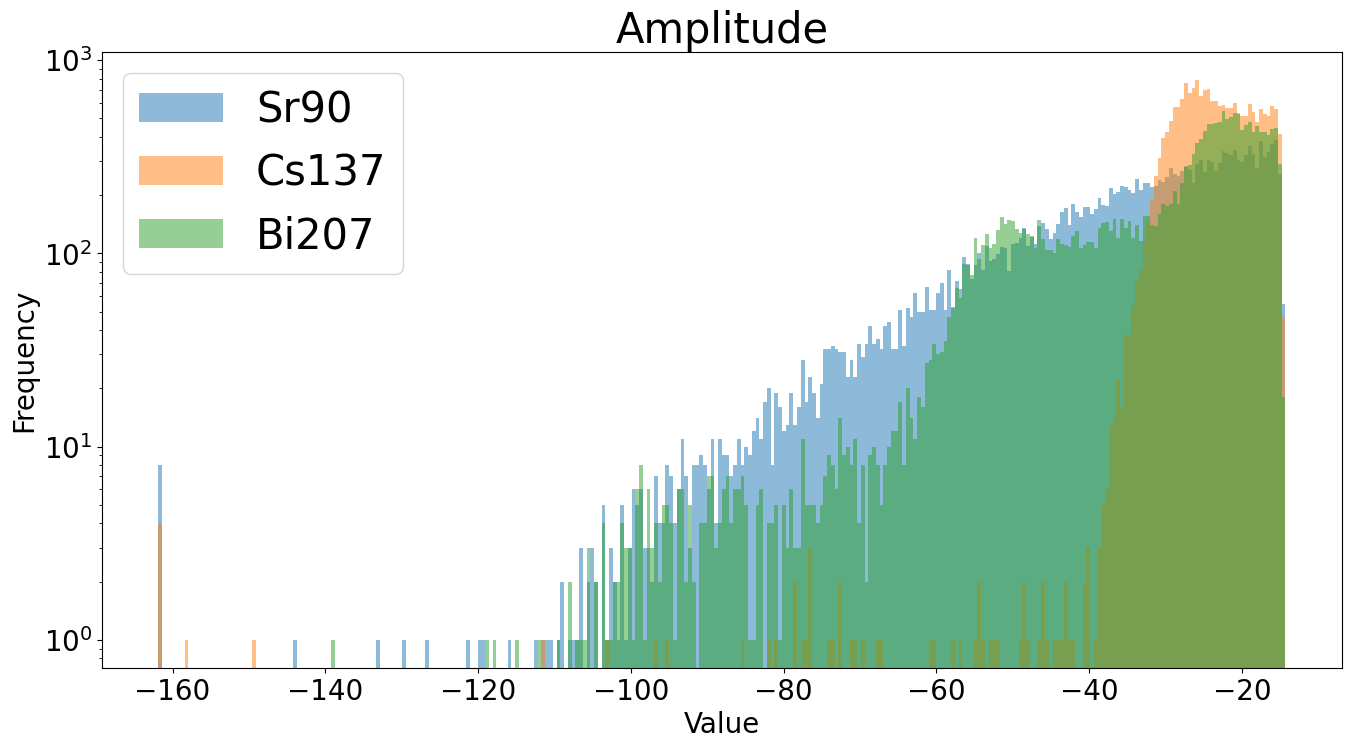

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 0])
max = np.amax(Sr90[:, 0])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 301)
ax.hist(Sr90[:, 0], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 0], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 0], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Amplitude', fontsize=30)
plt.show()

Minimum value of the array: -3547.9047446688
Maximum value of the array: -178.771955468


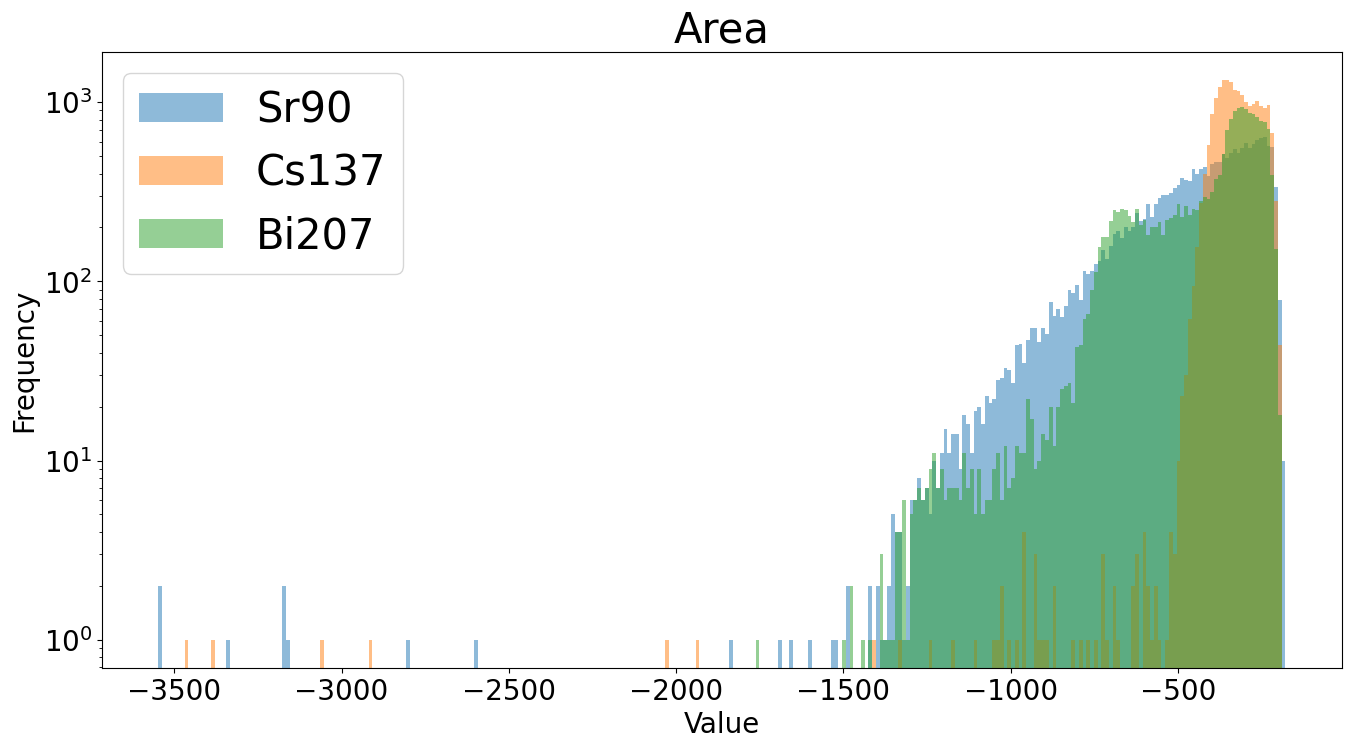

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 1])
max = np.amax(Sr90[:, 1])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 301)
ax.hist(Sr90[:, 1], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 1], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 1], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Area', fontsize=30)
plt.show()

###3. Removing Outlier Data (Background)

In [6]:
Sr90_X = Sr90
Cs137_X = Cs137
Bi207_X = Bi207


# Sr90_X = Sr90[:, 2:]
# Cs137_X = Cs137[:, 2:]
# Bi207_X = Bi207[:, 2:]

# Sr90_X = Sr90[:, :5]
# Cs137_X = Cs137[:, :5]
# Bi207_X = Bi207[:, :5]

In [7]:
# print(Sr90_X[1,:])

In [8]:
Sr90_X_mask = Sr90_X[:, 0] < -150
Sr90_X = Sr90_X[~Sr90_X_mask]
print(Sr90_X.shape)

Cs137_X_mask = Cs137_X[:, 0] < -40
Cs137_X = Cs137_X[~Cs137_X_mask]
print(Cs137_X.shape)

Bi207_X_mask = Bi207_X[:, 0] < -120
Bi207_X = Bi207_X[~Bi207_X_mask]
print(Bi207_X.shape)

(19992, 25)
(19940, 25)
(19999, 25)


In [9]:
Sr90_X_mask2 = Sr90_X[:, 1] < -1500
Sr90_X = Sr90_X[~Sr90_X_mask2]
print(Sr90_X.shape)

Cs137_X_mask2 = Cs137_X[:, 1] < -1500
Cs137_X = Cs137_X[~Cs137_X_mask2]
print(Cs137_X.shape)

Bi207_X_mask2 = Bi207_X[:, 1] < -1500
Bi207_X = Bi207_X[~Bi207_X_mask2]
print(Bi207_X.shape)

(19986, 25)
(19940, 25)
(19998, 25)


Minimum value of the array: -119.262
Maximum value of the array: -14.3094


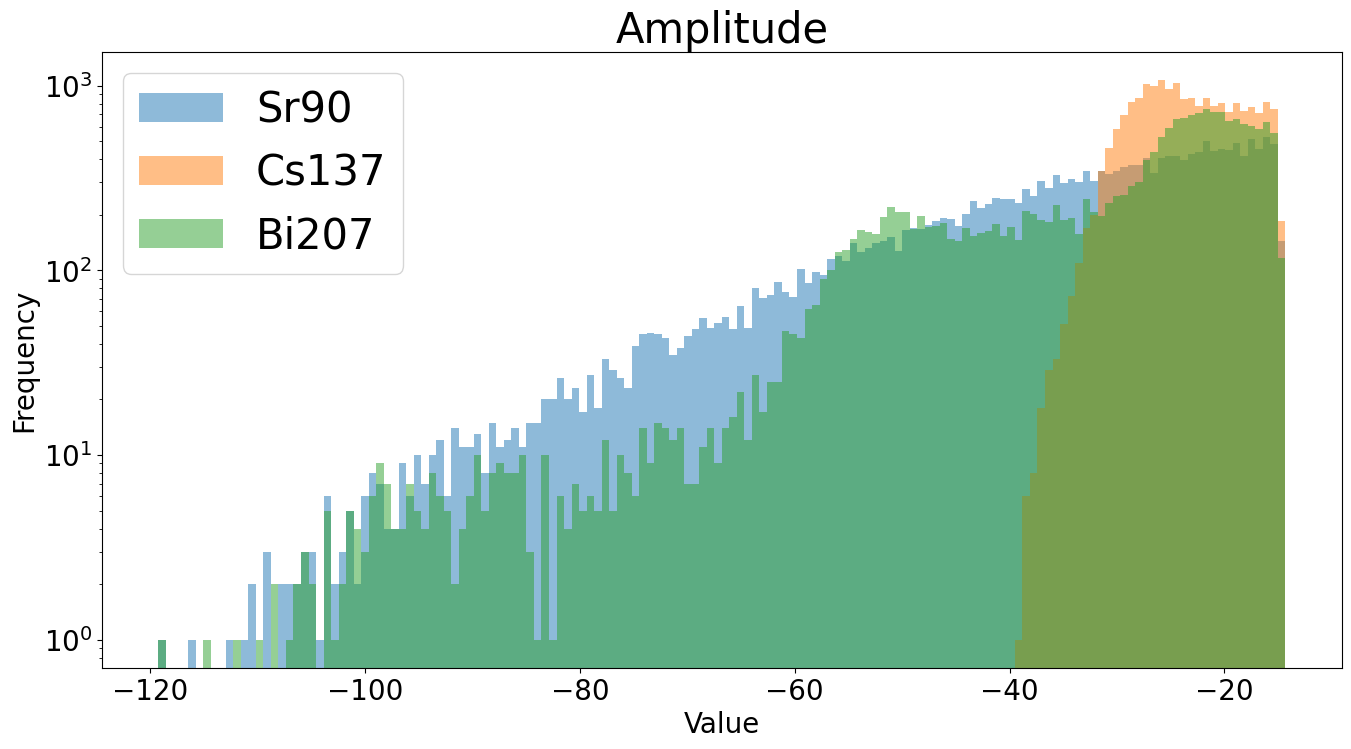

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 0])
max = np.amax(Sr90_X[:, 0])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 0], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 0], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 0], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Amplitude', fontsize=30)
plt.show()

Minimum value of the array: -1490.0801773938
Maximum value of the array: -178.771955468


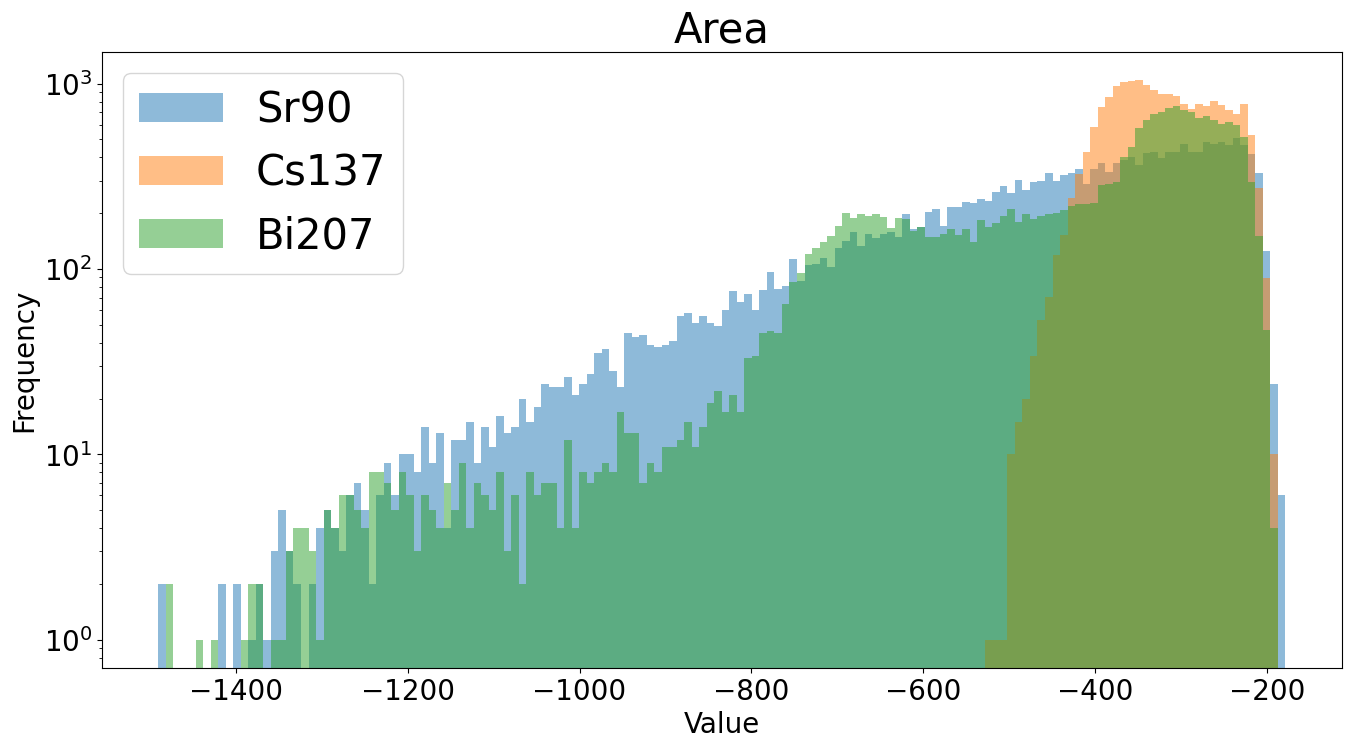

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 1])
max = np.amax(Sr90_X[:, 1])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 1], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 1], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 1], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Area', fontsize=30)
plt.show()

Minimum value of the array: 8.25
Maximum value of the array: 12.699800000000002


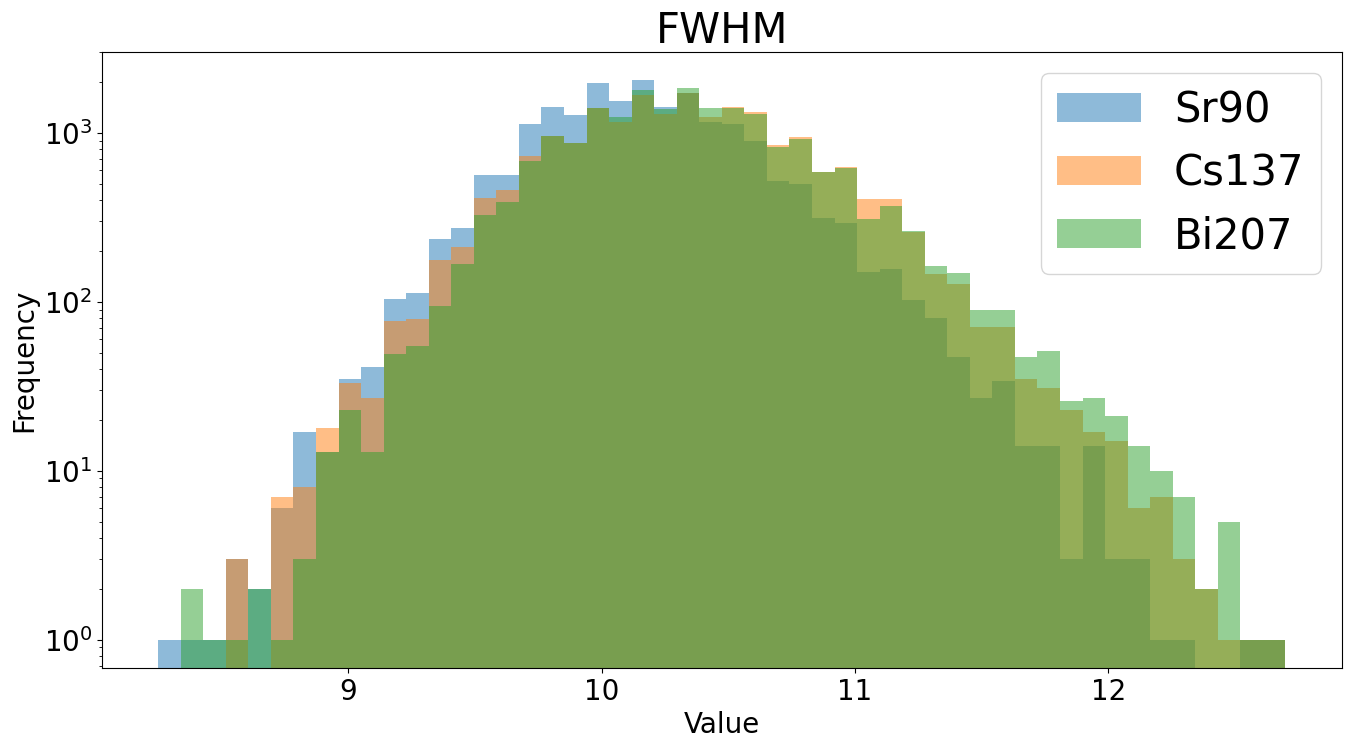

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 2])
max = np.amax(Sr90_X[:, 2])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 51)
ax.hist(Sr90_X[:, 2], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 2], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 2], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('FWHM', fontsize=30)
plt.show()

Minimum value of the array: 3.2250500000000004
Maximum value of the array: 5.925014999999999


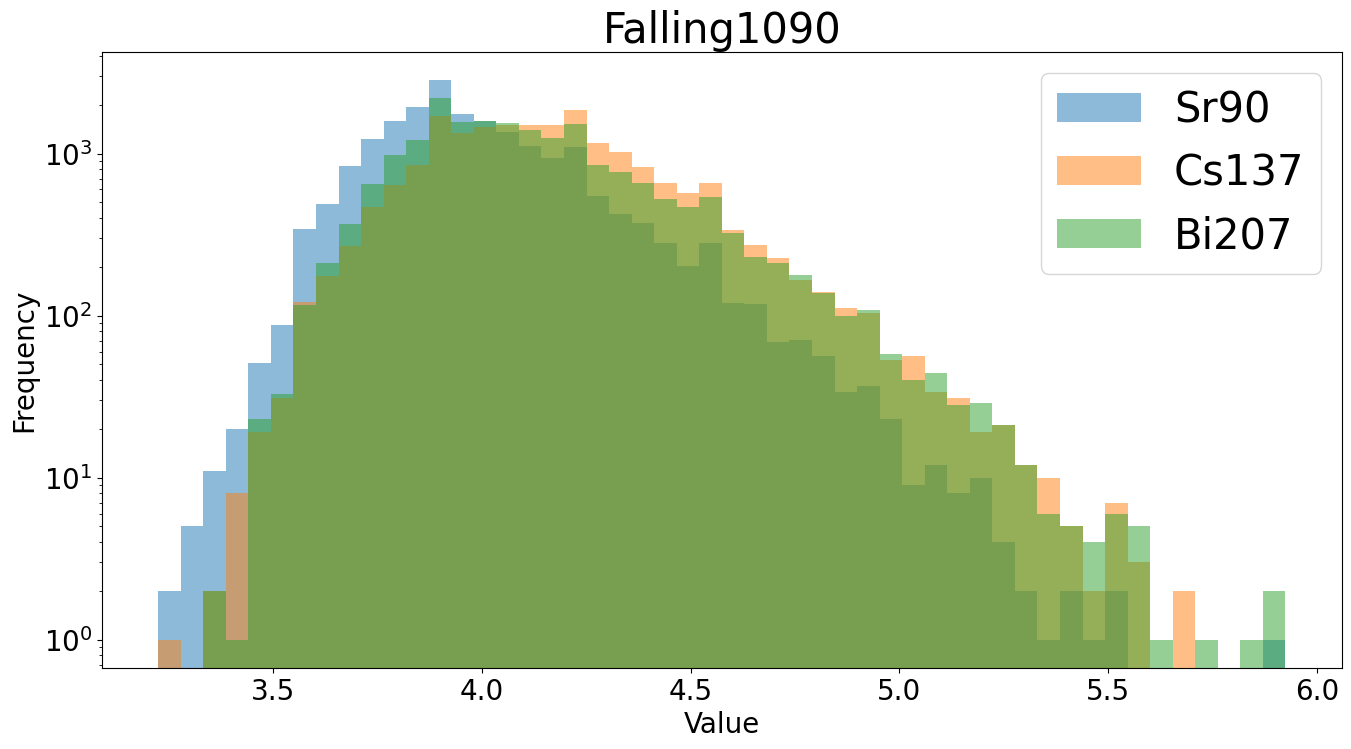

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 3])
max = np.amax(Sr90_X[:, 3])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 51)
ax.hist(Sr90_X[:, 3], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 3], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 3], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Falling1090', fontsize=30)
plt.show()

Minimum value of the array: 14.7001
Maximum value of the array: 31.950400000000005


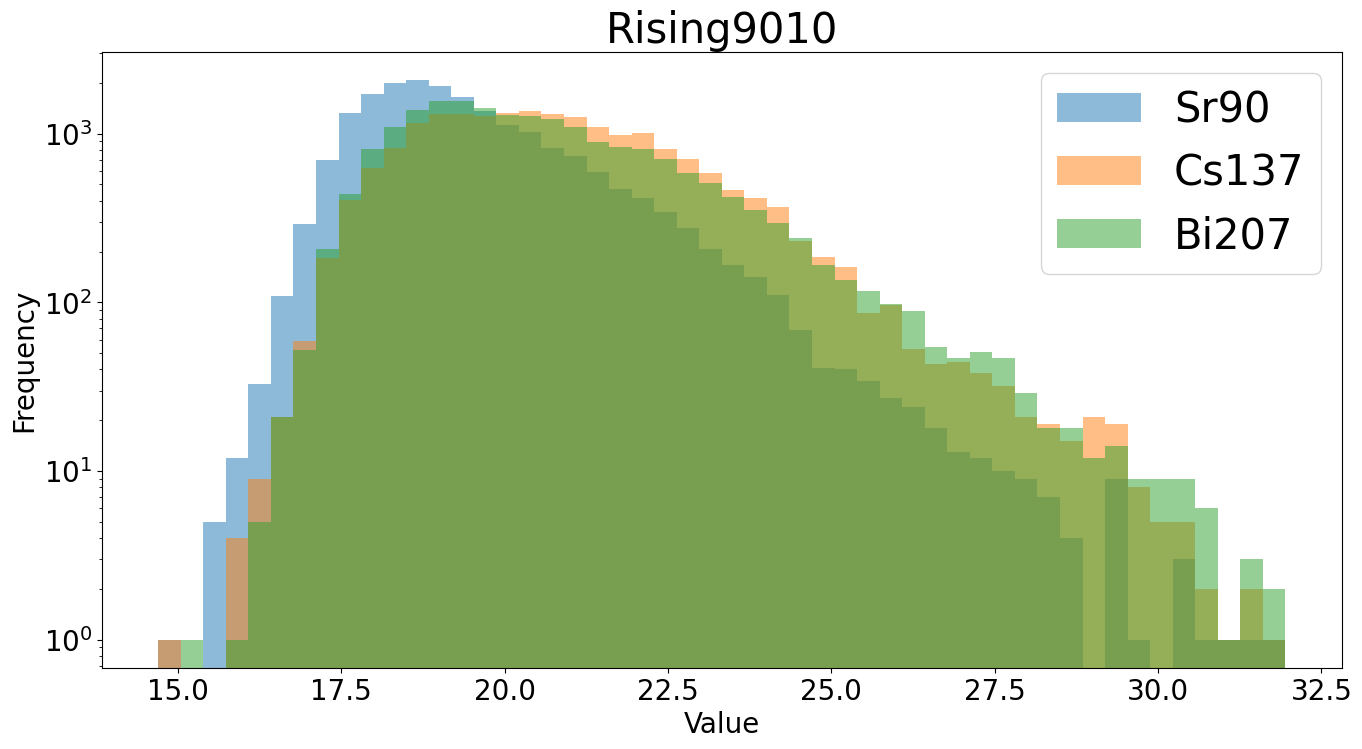

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 4])
max = np.amax(Sr90_X[:, 4])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 51)
ax.hist(Sr90_X[:, 4], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 4], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 4], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Rising9010', fontsize=30)
plt.show()

Minimum value of the array: -0.1257101349453935
Maximum value of the array: -0.010342185867729862


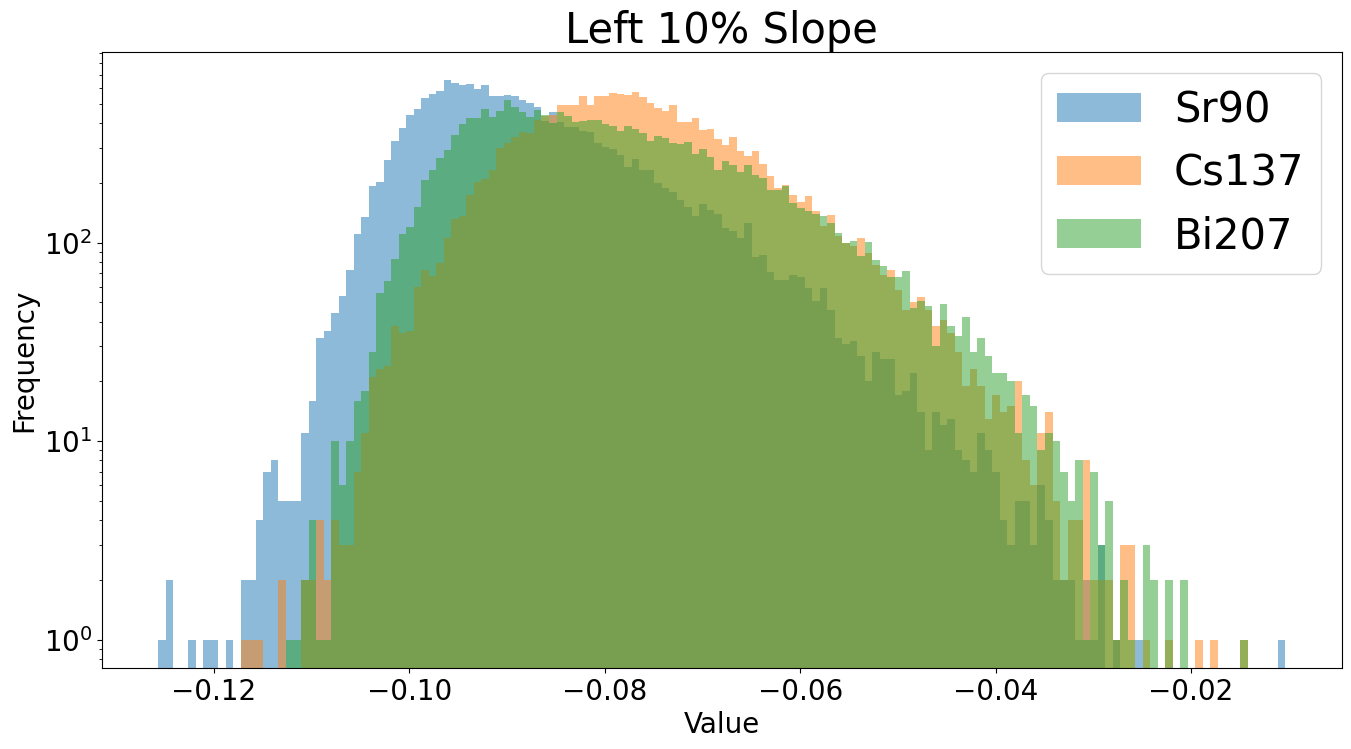

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 3])
max = np.amax(Sr90_X[:, 3])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 3], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 3], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 3], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Left 10% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.19071419029015027
Maximum value of the array: -0.10493777869780593


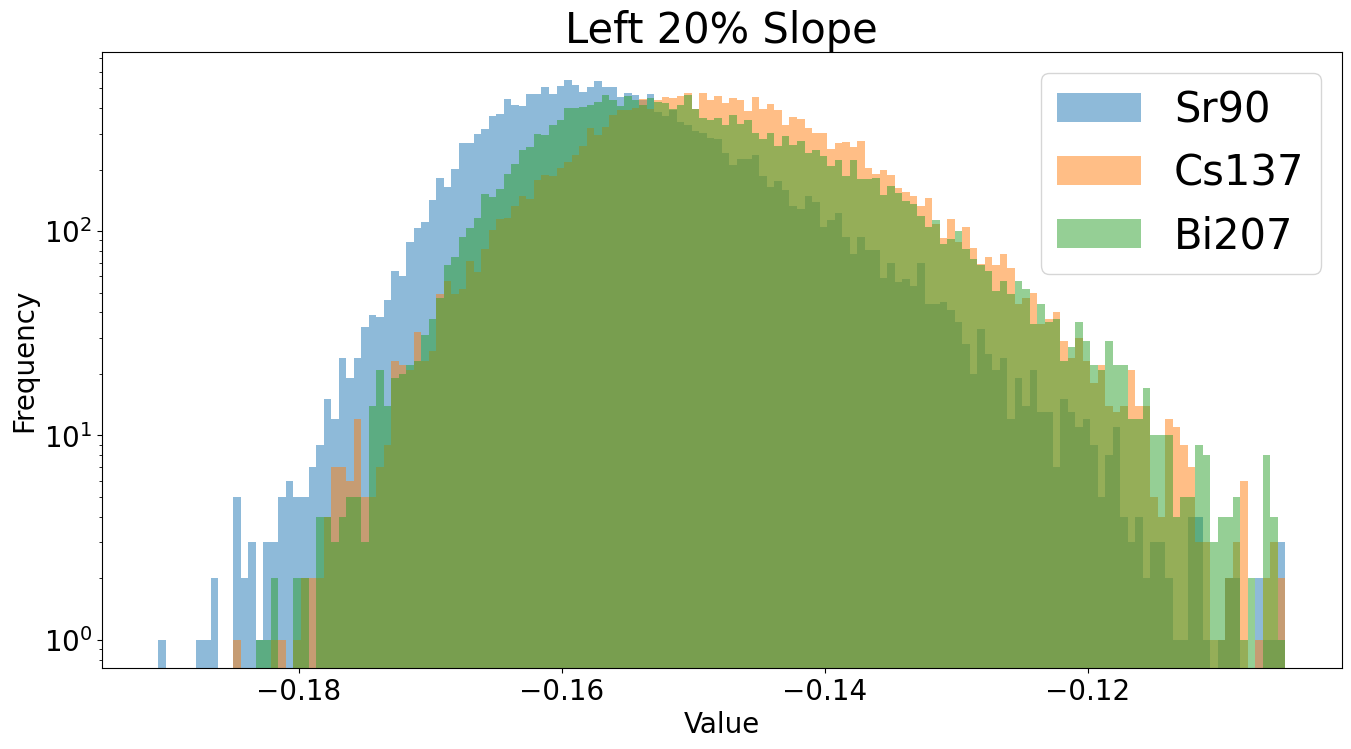

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 4])
max = np.amax(Sr90_X[:, 4])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 4], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 4], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 4], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Left 20% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.23472338632606038
Maximum value of the array: -0.14129792636996497


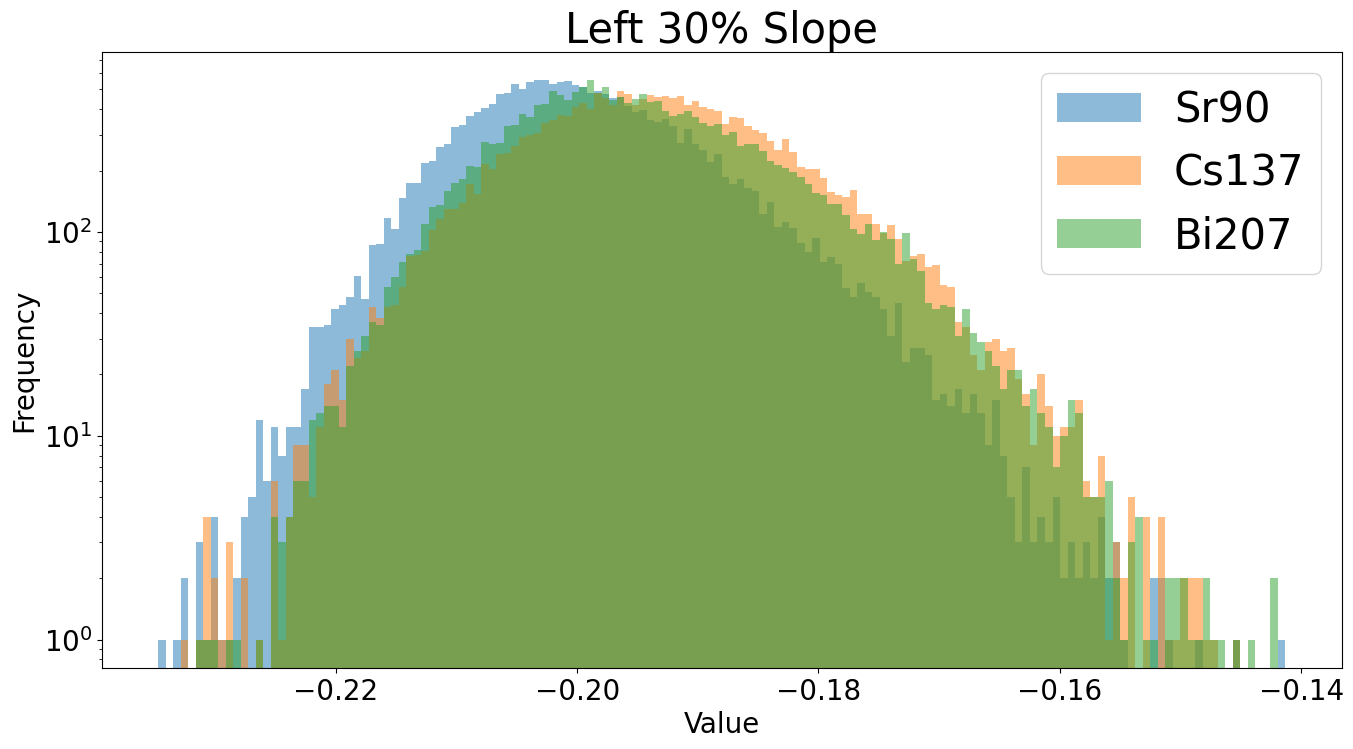

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 5])
max = np.amax(Sr90_X[:, 5])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 5], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 5], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 5], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Left 30% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.26760340772306596
Maximum value of the array: -0.1630021526101316


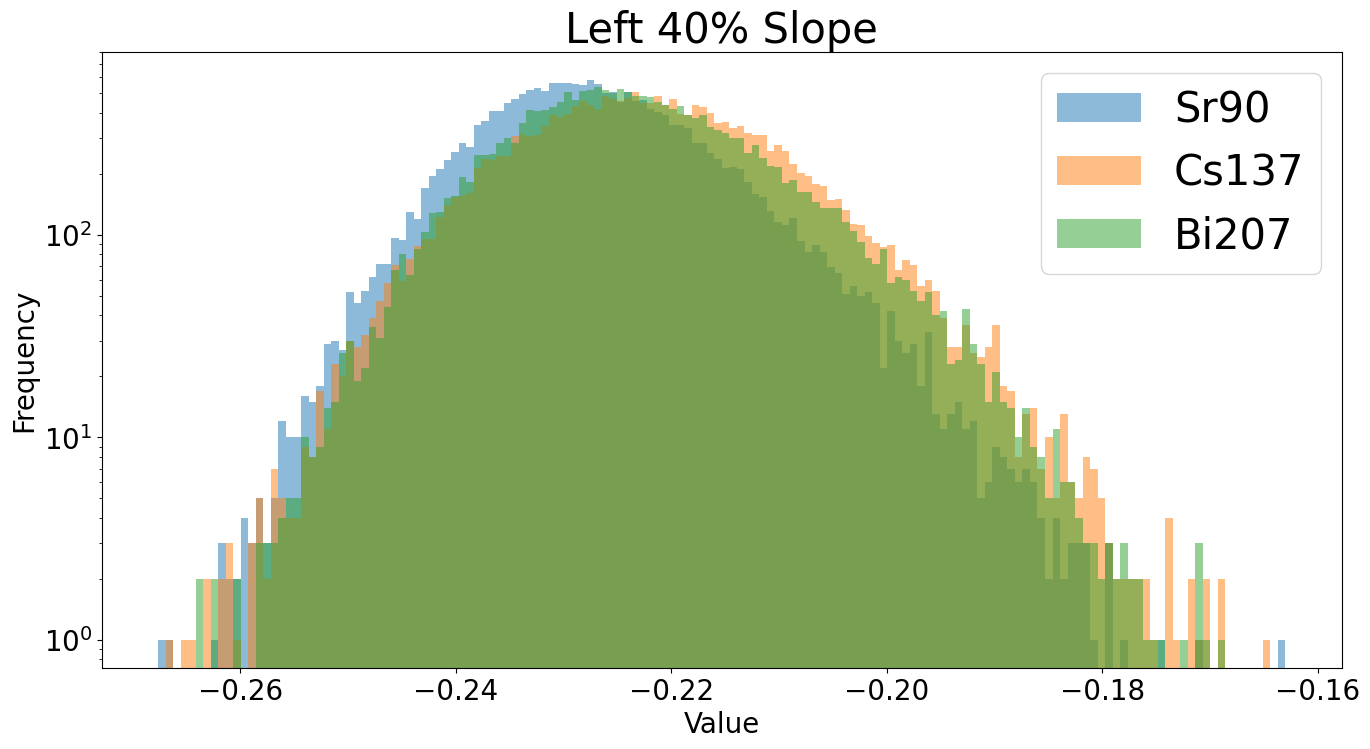

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 6])
max = np.amax(Sr90_X[:, 6])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 6], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 6], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 6], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Left 40% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.29298486323759754
Maximum value of the array: -0.18190803906296146


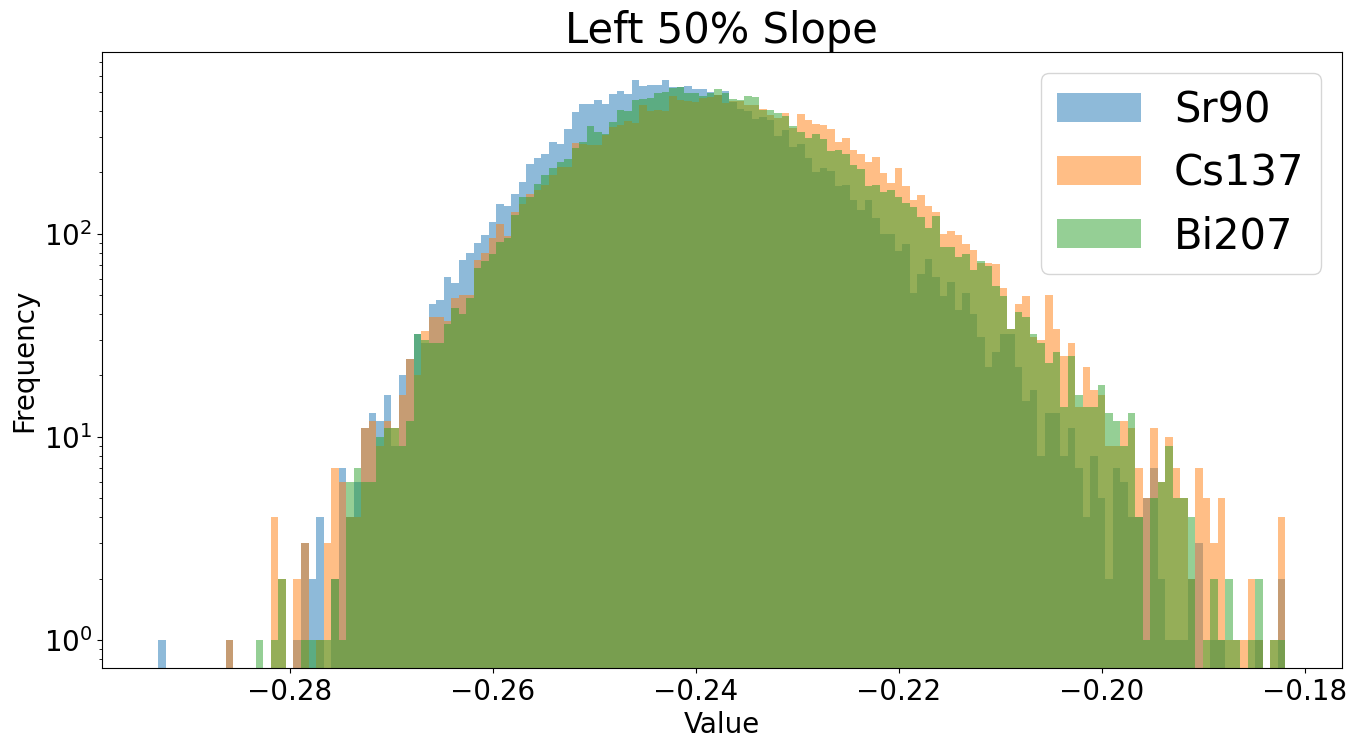

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 7])
max = np.amax(Sr90_X[:, 7])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 7], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 7], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 7], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Left 50% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.3001871549238794
Maximum value of the array: -0.17238550772765013


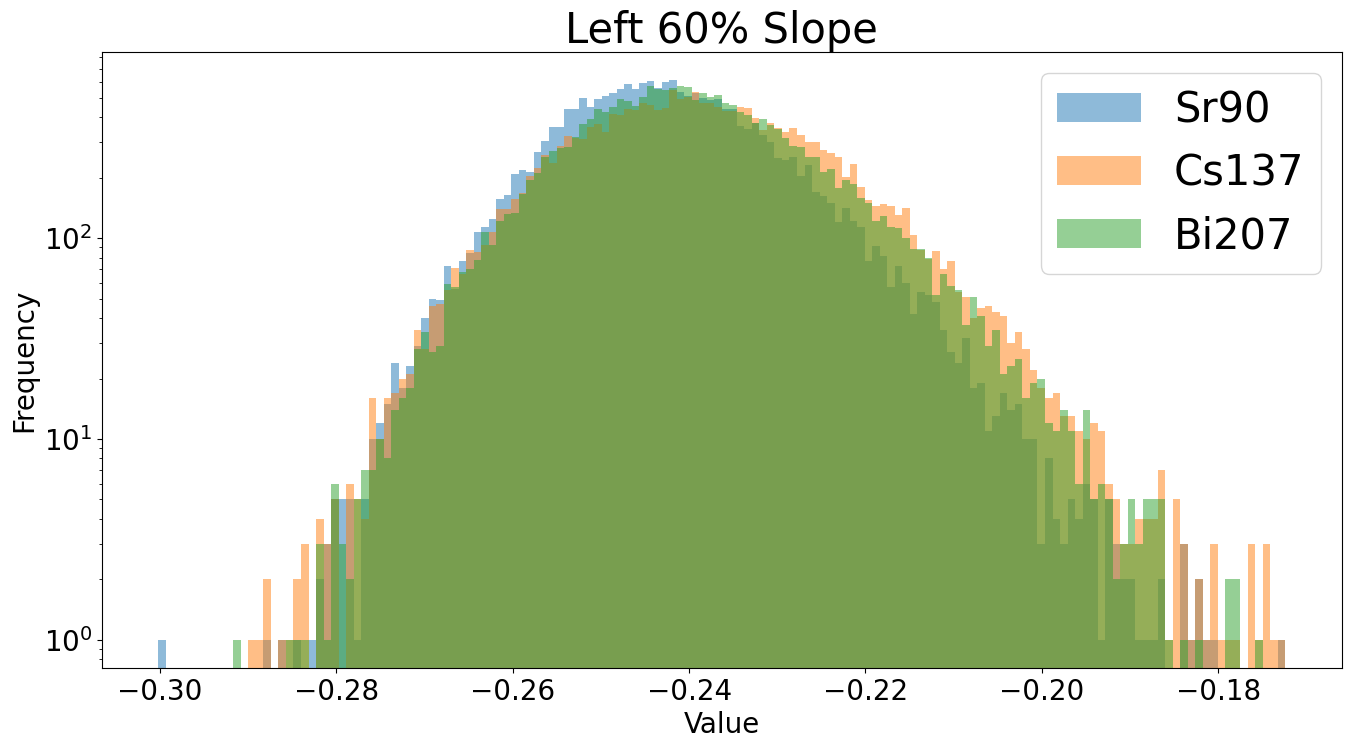

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 8])
max = np.amax(Sr90_X[:, 8])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 8], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 8], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 8], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Left 60% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.28934194109510114
Maximum value of the array: -0.15387224758105184


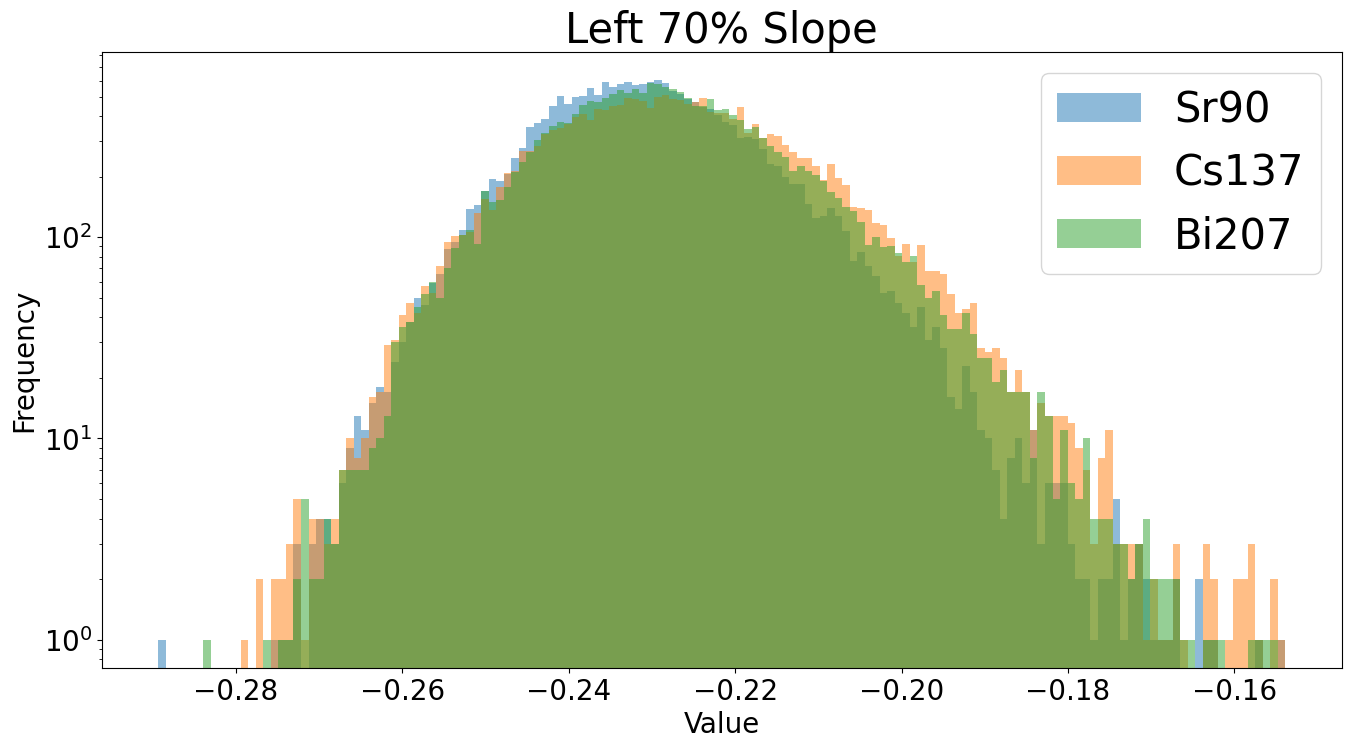

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 9])
max = np.amax(Sr90_X[:, 9])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 9], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 9], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 9], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Left 70% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.25942340013943843
Maximum value of the array: -0.11962647939074848


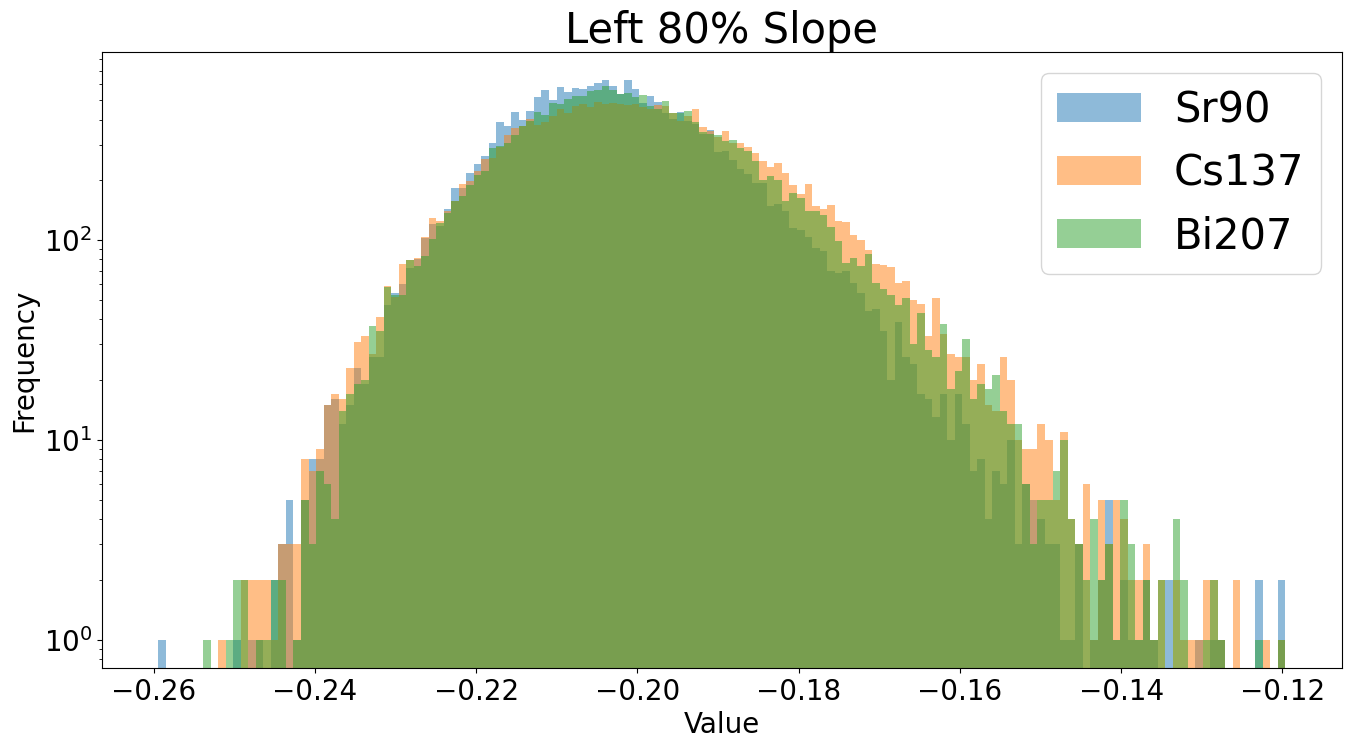

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 10])
max = np.amax(Sr90_X[:, 10])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 10], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 10], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 10], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Left 80% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.21626809177506623
Maximum value of the array: -0.08152295331468094


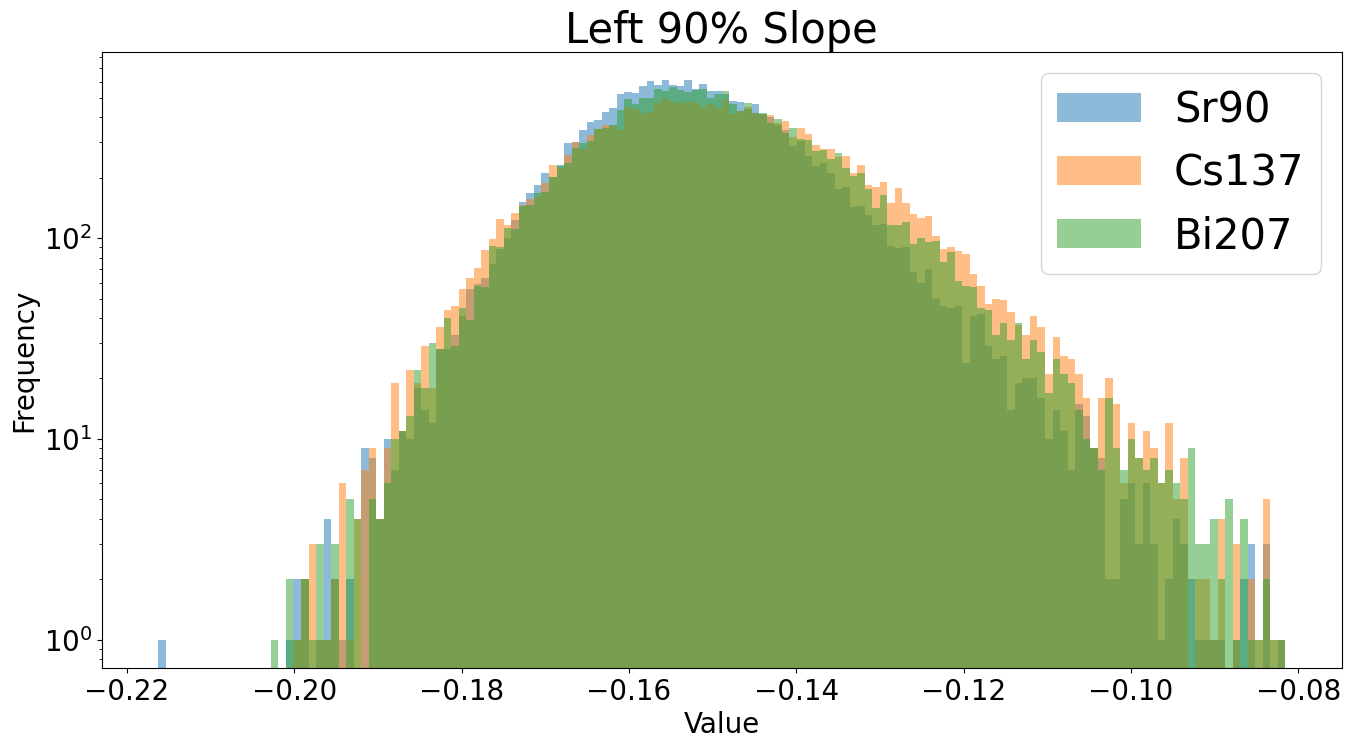

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 11])
max = np.amax(Sr90_X[:, 11])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 11], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 11], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 11], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Left 90% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.013940344934675476
Maximum value of the array: 0.03745870416311876


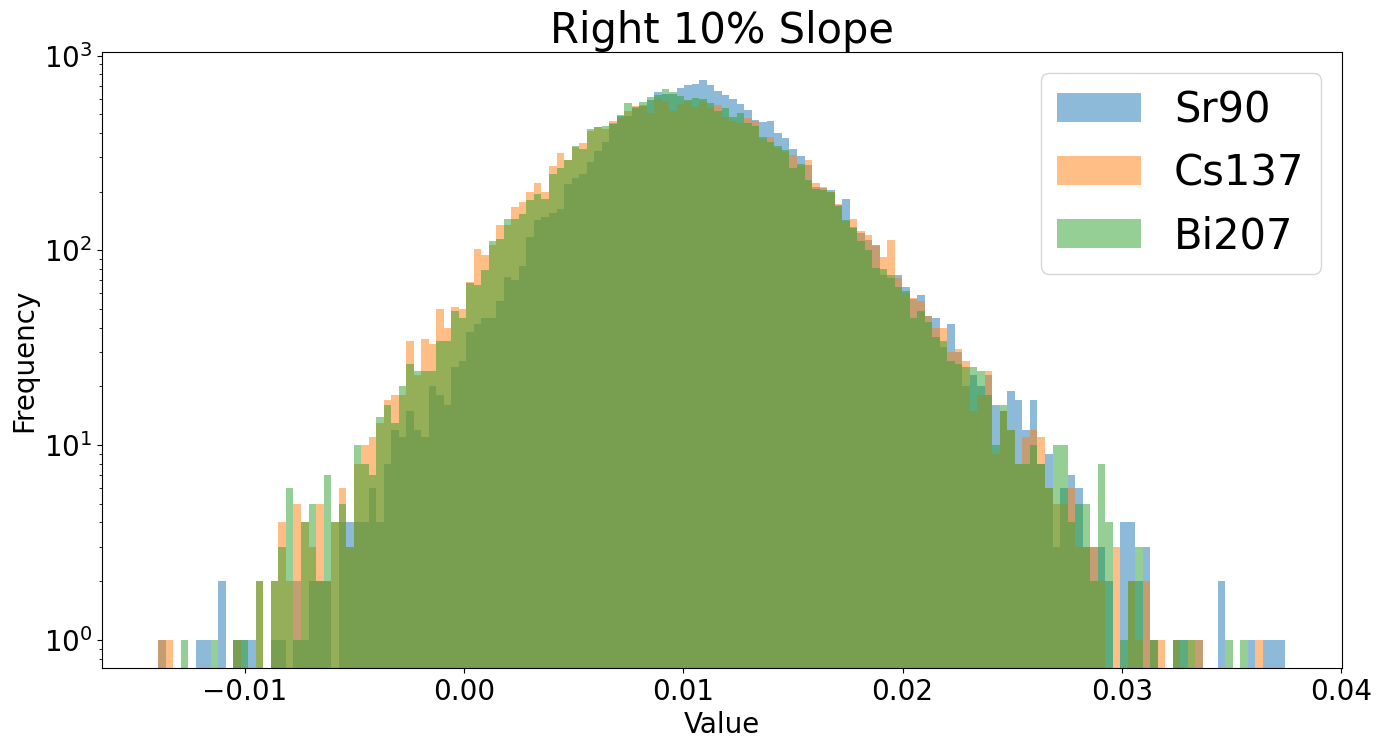

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 13])
max = np.amax(Sr90_X[:, 13])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 13], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 13], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 13], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Right 10% Slope', fontsize=30)
plt.show()

Minimum value of the array: -0.0071776233134755955
Maximum value of the array: 0.058950901048107955


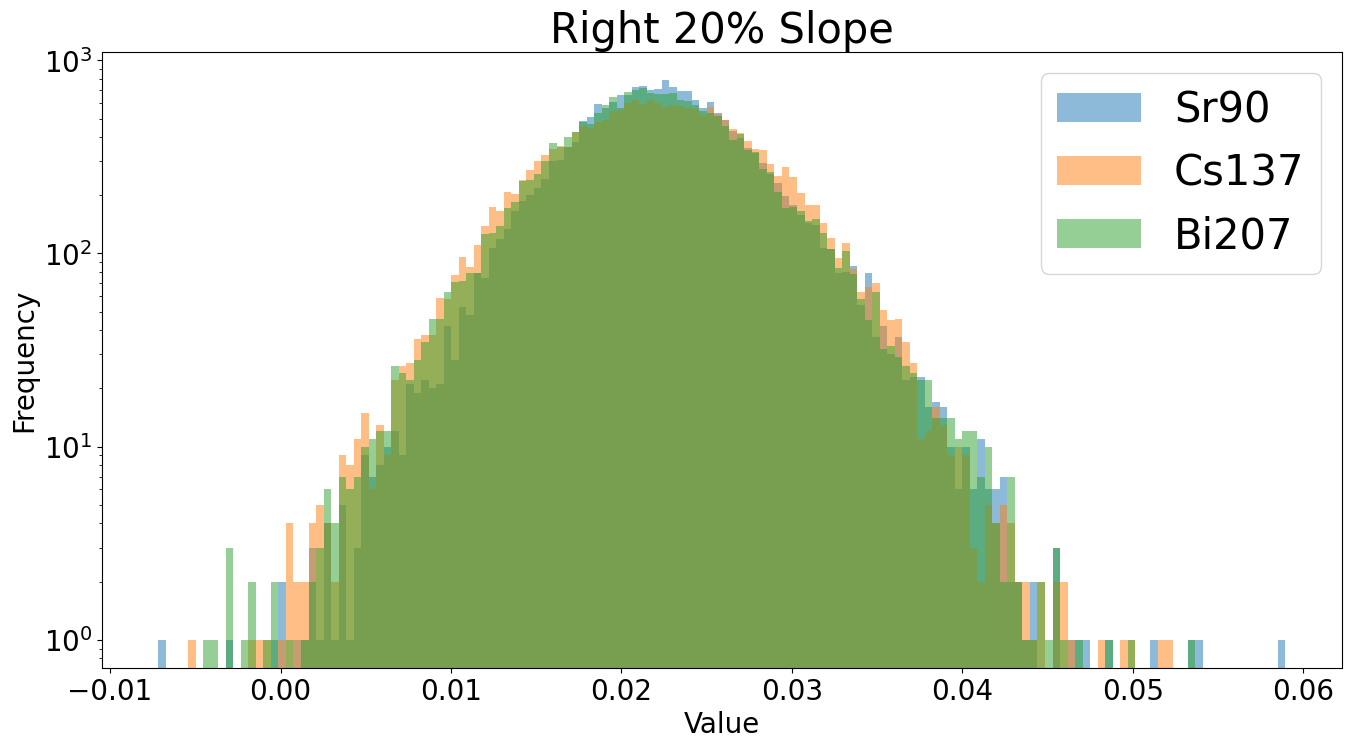

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 14])
max = np.amax(Sr90_X[:, 14])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 14], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 14], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 14], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Right 20% Slope', fontsize=30)
plt.show()

Minimum value of the array: 0.00416954156985282
Maximum value of the array: 0.06929610554369398


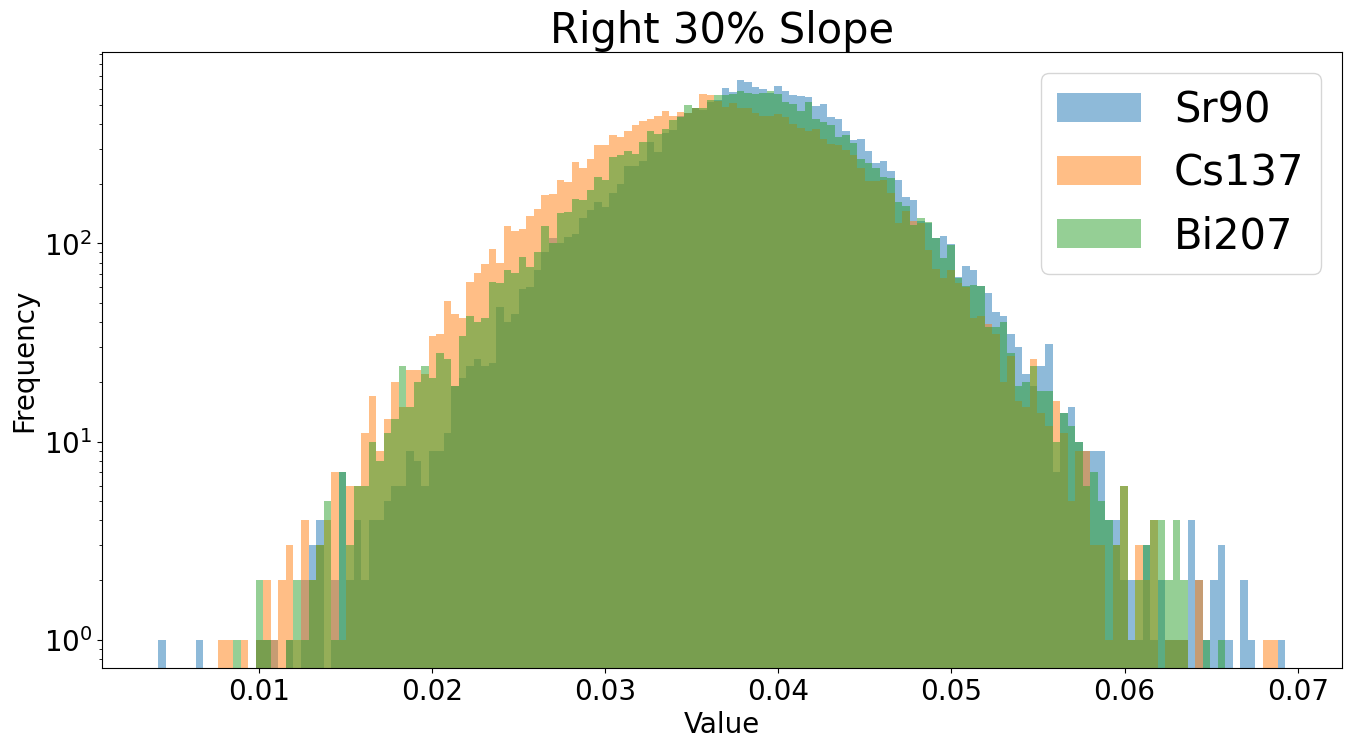

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 15])
max = np.amax(Sr90_X[:, 15])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 15], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 15], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 15], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Right 30% Slope', fontsize=30)
plt.show()

Minimum value of the array: 0.01186980190962782
Maximum value of the array: 0.09204834246229064


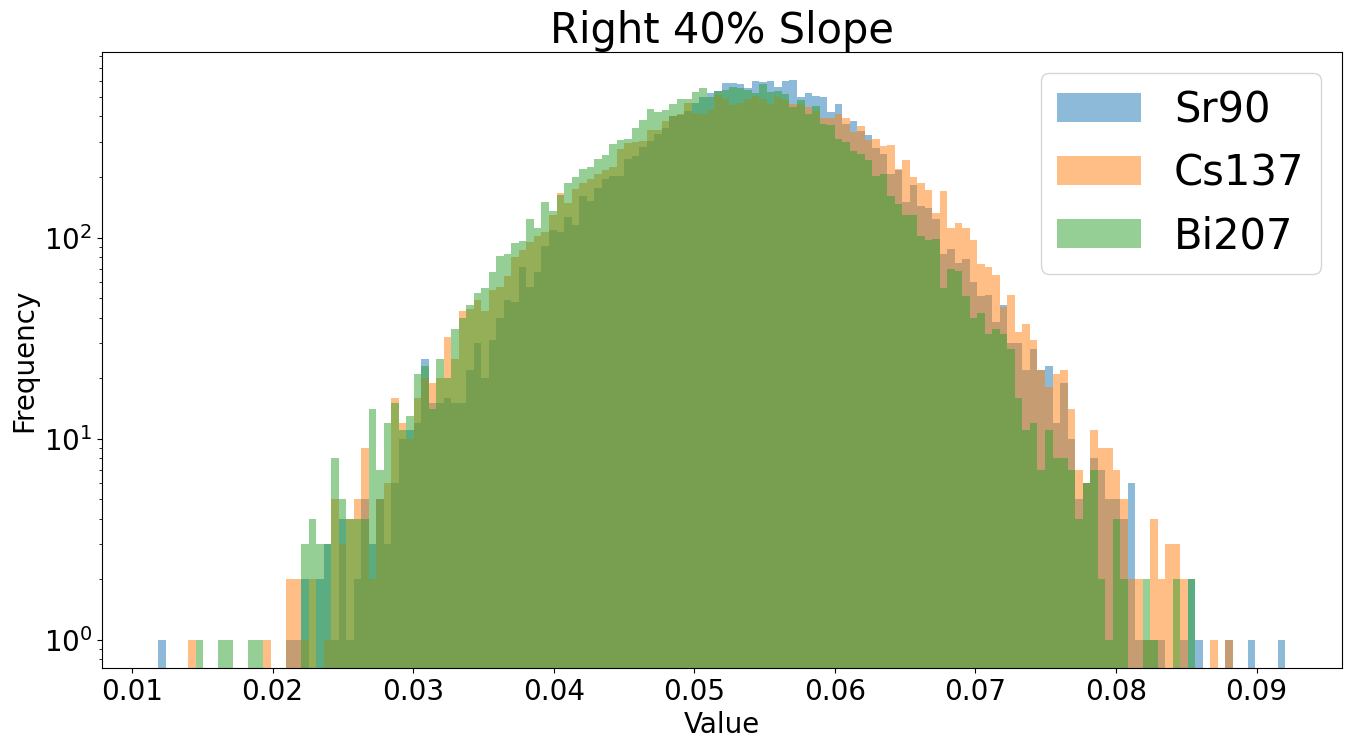

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 16])
max = np.amax(Sr90_X[:, 16])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 16], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 16], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 16], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Right 40% Slope', fontsize=30)
plt.show()

Minimum value of the array: 0.030956409186750373
Maximum value of the array: 0.10513198013955116


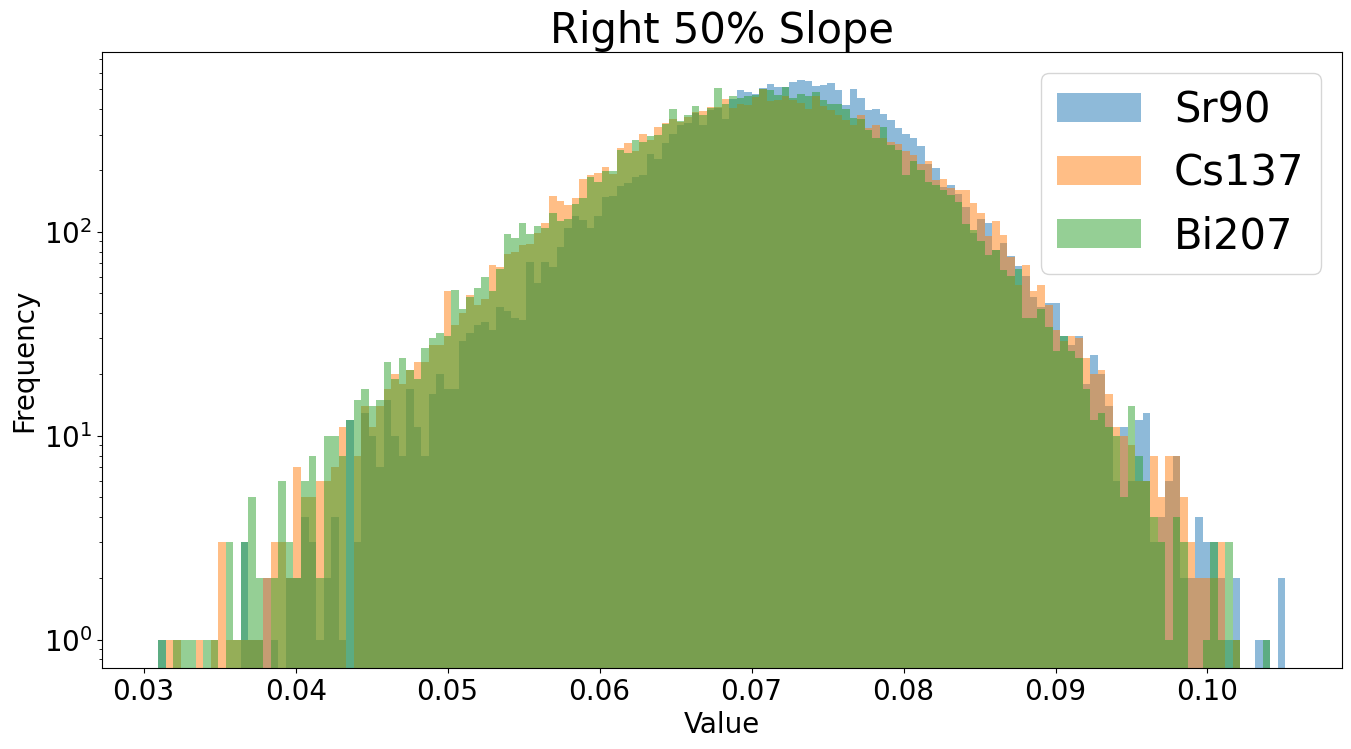

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 17])
max = np.amax(Sr90_X[:, 17])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 17], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 17], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 17], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Right 50% Slope', fontsize=30)
plt.show()

Minimum value of the array: 0.03452611975216714
Maximum value of the array: 0.12557775672322144


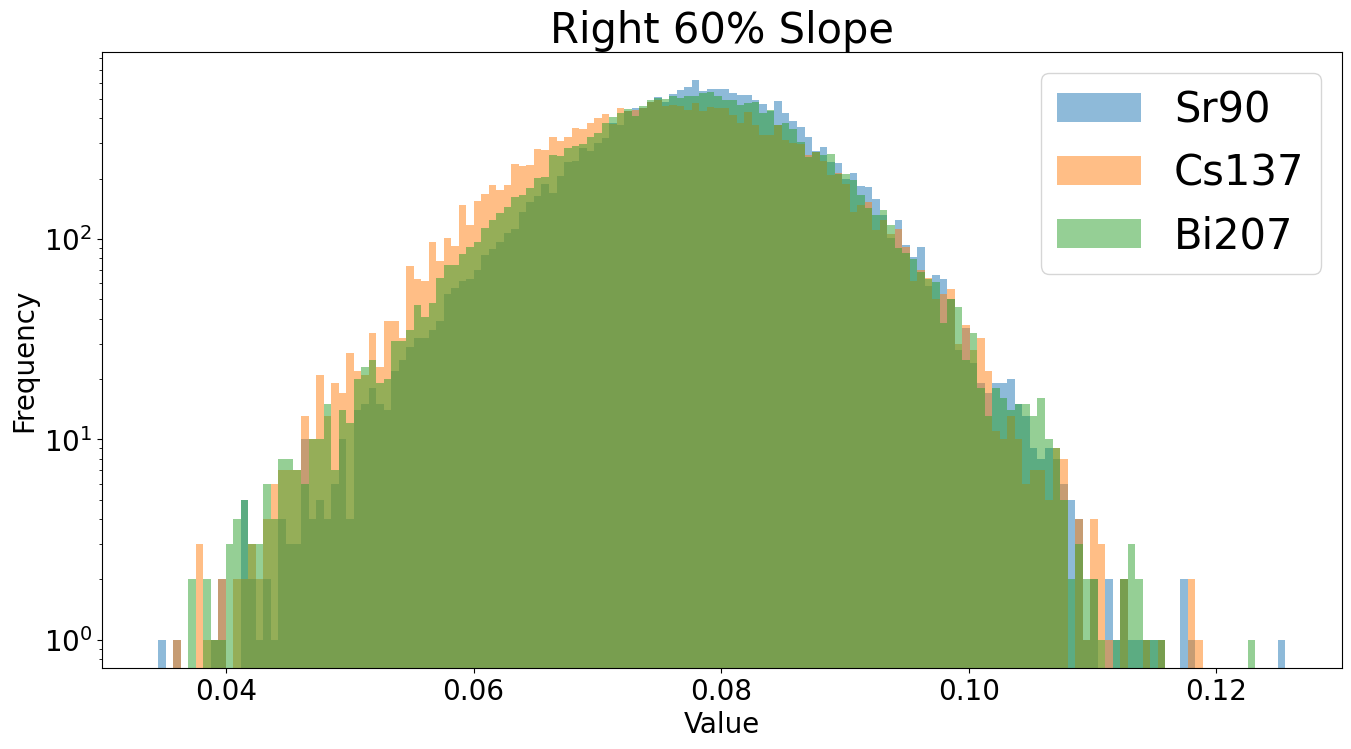

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 18])
max = np.amax(Sr90_X[:, 18])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 18], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 18], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 18], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Right 60% Slope', fontsize=30)
plt.show()

Minimum value of the array: 0.025219197364710608
Maximum value of the array: 0.1254687899592246


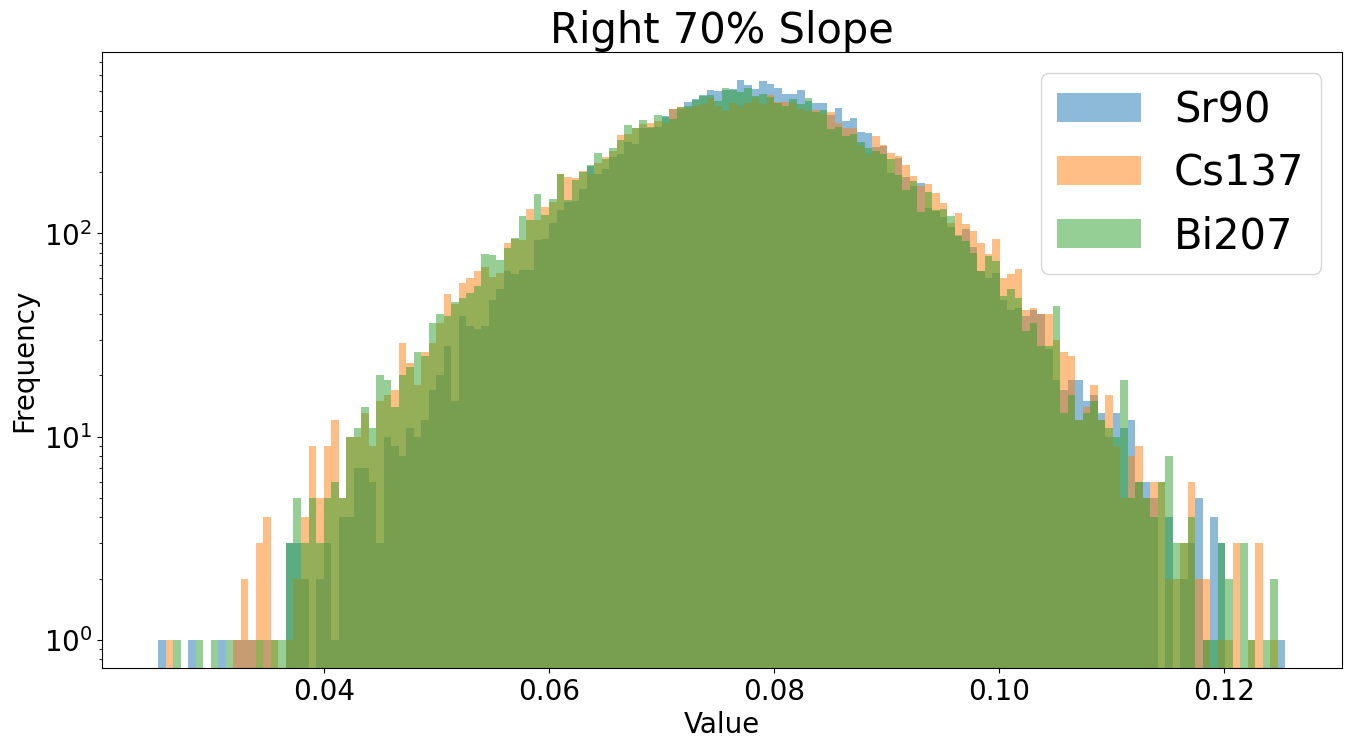

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 19])
max = np.amax(Sr90_X[:, 19])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 19], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 19], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 19], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Right 70% Slope', fontsize=30)
plt.show()

Minimum value of the array: 0.03138092014366074
Maximum value of the array: 0.1387677236014633


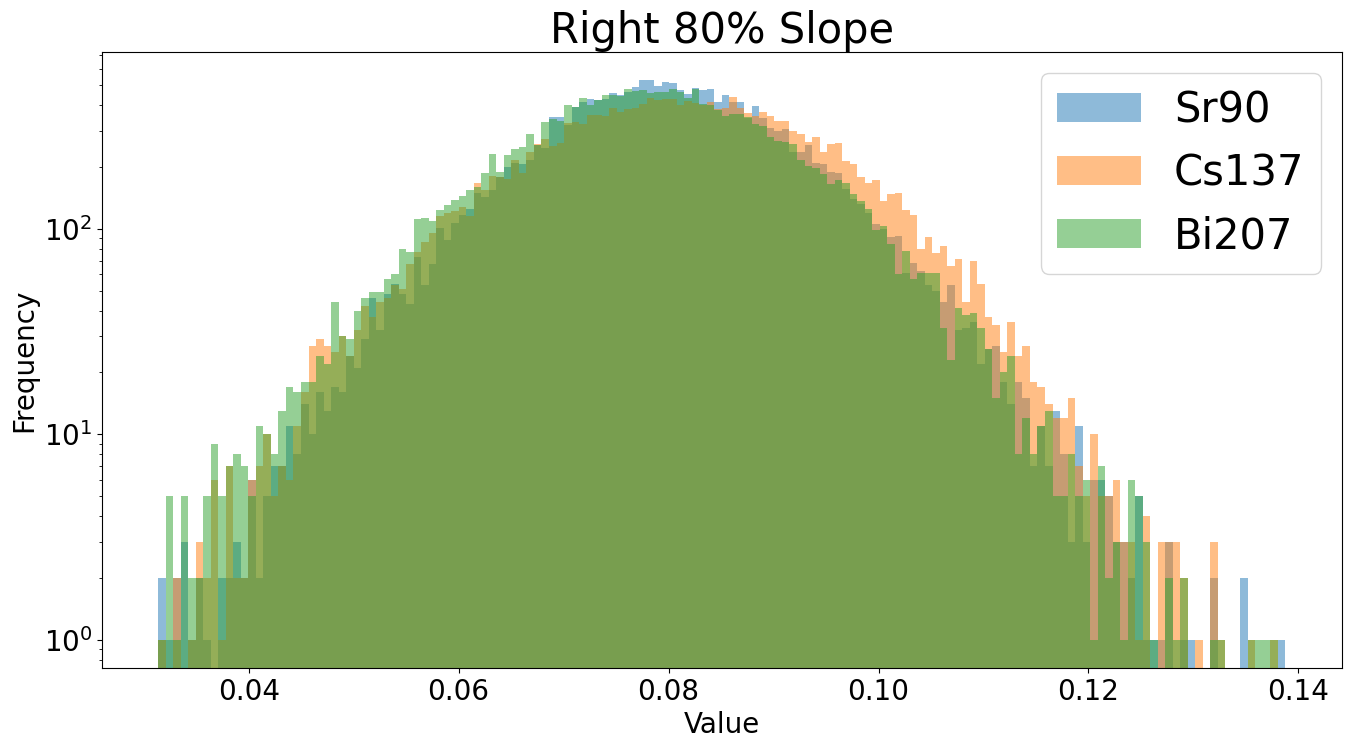

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 20])
max = np.amax(Sr90_X[:, 20])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 20], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 20], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 20], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Right 80% Slope', fontsize=30)
plt.show()

Minimum value of the array: 0.026920518090690813
Maximum value of the array: 0.13314398203105035


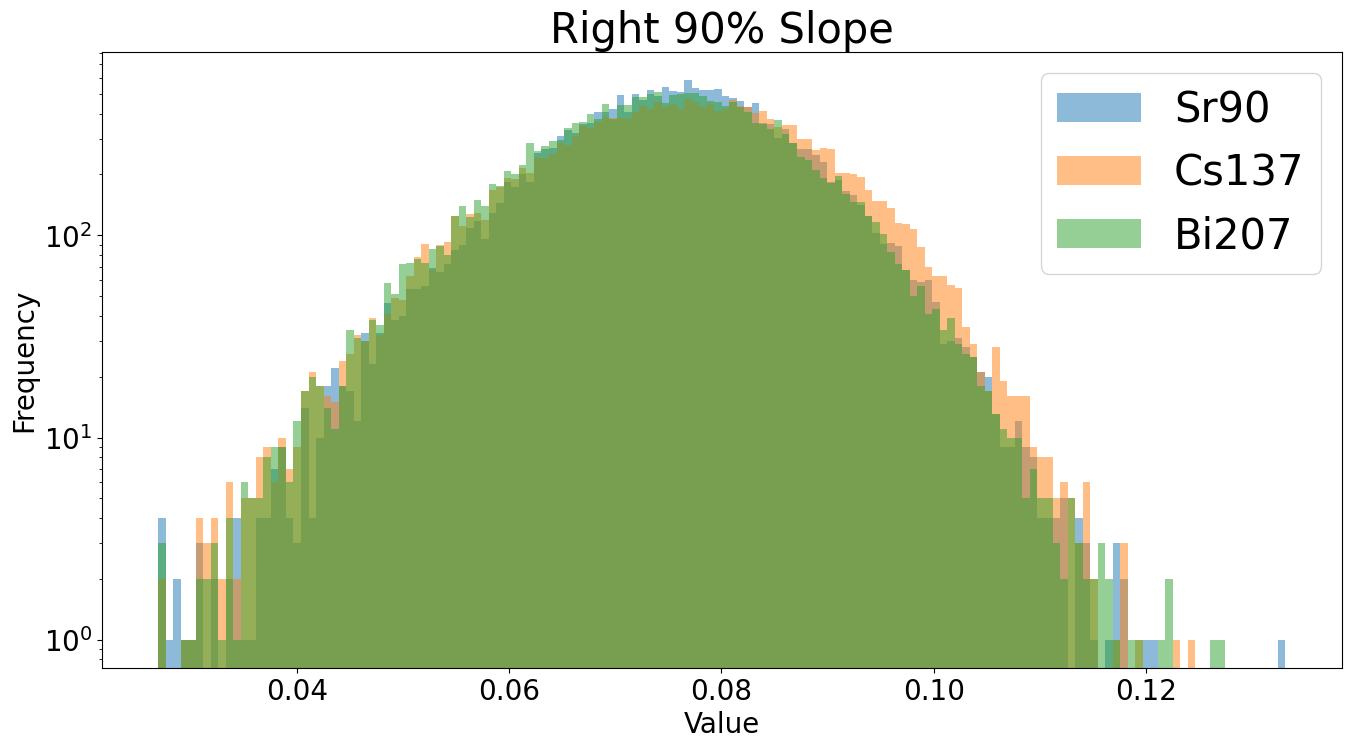

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 21])
max = np.amax(Sr90_X[:, 21])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 21], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 21], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 21], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Right 90% Slope', fontsize=30)
plt.show()

In [ ]:
# Sr90_X = Sr90_X[:, :5]
# Cs137_X = Cs137_X[:, :5]
# Bi207_X = Bi207_X[:, :5]

###4. Plot Again

In [ ]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(16, 8))


# # Find the minimum and maximum values of the array
# min = np.amin(Sr90_X[:, 0])
# max = np.amax(Sr90_X[:, 0])

# # Print the minimum and maximum values of the array
# print('Minimum value of the array:', min)
# print('Maximum value of the array:', max)


# bins = np.linspace(min, max, 501)
# ax.hist(Sr90_X[:, 0], bins, alpha=0.5, label='Sr90')
# ax.hist(Cs137_X[:, 0], bins, alpha=0.5, label='Cs137')
# ax.hist(Bi207_X[:, 0], bins, alpha=0.5, label='Bi207')
# #ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
# ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
# ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
# ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
# ax.set_yscale('log')  # y축을 로그 스케일로 변경
# ax.legend(fontsize=30)
# ax.set_title('Amplitude', fontsize=30)
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(16, 8))


# # Find the minimum and maximum values of the array
# min = np.amin(Sr90_X[:, 14])
# max = np.amax(Sr90_X[:, 14])

# # Print the minimum and maximum values of the array
# print('Minimum value of the array:', min)
# print('Maximum value of the array:', max)


# bins = np.linspace(min, max, 71)
# ax.hist(Sr90_X[:, 14], bins, alpha=0.5, label='Sr90')
# ax.hist(Cs137_X[:, 14], bins, alpha=0.5, label='Cs137')
# ax.hist(Bi207_X[:, 14], bins, alpha=0.5, label='Bi207')
# #ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
# ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
# ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
# ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
# ax.set_yscale('log')  # y축을 로그 스케일로 변경
# ax.legend(fontsize=30)
# ax.set_title('Area', fontsize=30)
# plt.show()

###5. Collect a data to use

In [ ]:
# Sr90_X = np.column_stack((Sr90_X[:, 0], Sr90_X[:, 5:10], Sr90_X[:, 12:]))
# Cs137_X = np.column_stack((Cs137_X[:, 0], Cs137_X[:, 5:10], Cs137_X[:, 12:]))
# Bi207_X = np.column_stack((Bi207_X[:, 0], Bi207_X[:, 5:10], Bi207_X[:, 12:]))


# print(Sr90_X.shape)
# print(Cs137_X.shape)
# print(Bi207_X.shape)

In [ ]:
# Sr90_X = Sr90
# Cs137_X = Cs137
# Bi207_X = Bi207

In [ ]:
print(Sr90_X.shape)
print(Cs137_X.shape)
print(Bi207_X.shape)

(19986, 25)
(19940, 25)
(19998, 25)


In [ ]:
# Sr90_Y = np.full(5000, 90, dtype=np.int32)
# Cs137_Y = np.full(5000, 137, dtype=np.int32)
# Bi207_Y = np.full(5000, 207, dtype=np.int32)

# Sr90_Y = np.full(20000, 90, dtype=np.int32)
# Cs137_Y = np.full(20000, 137, dtype=np.int32)
# Bi207_Y = np.full(20000, 207, dtype=np.int32)

Sr90_Y = np.full(19986, 90, dtype=np.int32)
Cs137_Y = np.full(19940, 137, dtype=np.int32)
Bi207_Y = np.full(19998, 207, dtype=np.int32)

In [ ]:
print(Sr90_Y.shape)
print(Cs137_Y.shape)
print(Bi207_Y.shape)

(19986,)
(19940,)
(19998,)


In [ ]:
X = np.concatenate([Sr90_X, Cs137_X, Bi207_X], axis=0)
X.shape

(59924, 25)

In [ ]:
y = np.concatenate([Sr90_Y, Cs137_Y, Bi207_Y], axis=0)
y.shape

(59924,)

###7. Random Forest

# Ensemble Learning | Random Forests

* ask many people a complex question and aggregate their answers - the **wisdom of the crowds**
* aggregate the predictions of a group of predictors (classifiers or regressors) --> better predictions than the best individual predictor
* a group of predictors is called an **ensemble**; the technique is called **ensemble learning**
* e.g., you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you obtain the predictions of all the indivisual trees, then predict the class that gets the most votes --> **Random Forest**
* the winning solutions in ML competitions often involve ensemble methods

## Voting classifiers

* we have trained a few classifiers, each one achieving about 80% accuracy
* we can create an even better classifier is to aggreagte the predictions of each classifier and predict the class that gets the most votes
* this is called a **hard voting classifier**

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_moons

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Random Forests

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method, typically with `max_samples` set to the size of the training set. Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the **RandomForestClassifier** class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6691142113343569


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred2 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

0.5297376677124358


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=64, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred3 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred3))

0.5335424871503905


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=5000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred9 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred9))

0.5266671116747881


In [ ]:
!pip install tqdm
from tqdm import tqdm
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=5000, max_leaf_nodes=2500, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred10 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred10))

0.7567585608437354


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=5000, max_leaf_nodes=5000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred11 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred11))

0.7585608437353981


###8. Result

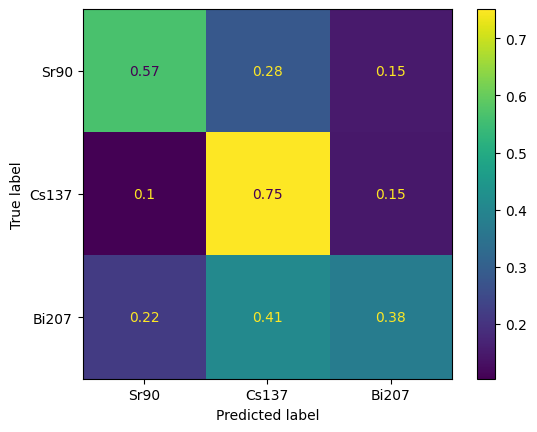

In [ ]:
#Confusion Matrix with percetage

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred9)

# Normalize the confusion matrix to show the probability values
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a ConfusionMatrixDisplay object with probability values
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sr90', 'Cs137', 'Bi207'])

# Display the confusion matrix with probability values
disp.plot()

In [ ]:
rnd_clf.feature_importances_

array([0.17934566, 0.16071614, 0.02857919, 0.04891542, 0.05661029,
       0.01502701, 0.04992588, 0.0423789 , 0.04486091, 0.04439495,
       0.0413674 , 0.03219882, 0.02818276, 0.0242377 , 0.02268808,
       0.01510244, 0.01662051, 0.01548584, 0.01621182, 0.020986  ,
       0.02047632, 0.01860225, 0.01845219, 0.01864324, 0.01999026])

In [ ]:
n_features = rnd_clf.n_features_in_

In [ ]:
feature_list = ['Amp', 'Rise/FWHM', 'Fall/FWHM', 'Rise/Fall', 'Rise/(Rise+Fall)', 'Fall(Rise+Fall)', 'Rise/Area', 'Fall/Area', 'Area', 'FWHM', 'Fall80-20', 'Rise80-20', 'Rise+Fall', 'Rise-Fall', '(Rise-Fall)/Amp', '(Rise-Fall)/Area', 'Rise/Amp', 'Fall/Amp', '(Rise-Fall) ^2', '(FallxAmp)/Area', '(RisexAmp)/Area', '(Rise+Fall)xAmp/Area', '(Rise-Fall)xAmp/Area']

<Figure size 5760x4320 with 0 Axes>

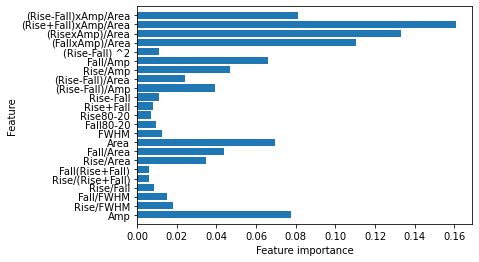

<Figure size 5760x4320 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.barh(np.arange(n_features), rnd_clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_list)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features);
plt.figure(figsize=(80, 60))

Minimum value of the array: 0.6318900000000001
Maximum value of the array: 0.83055


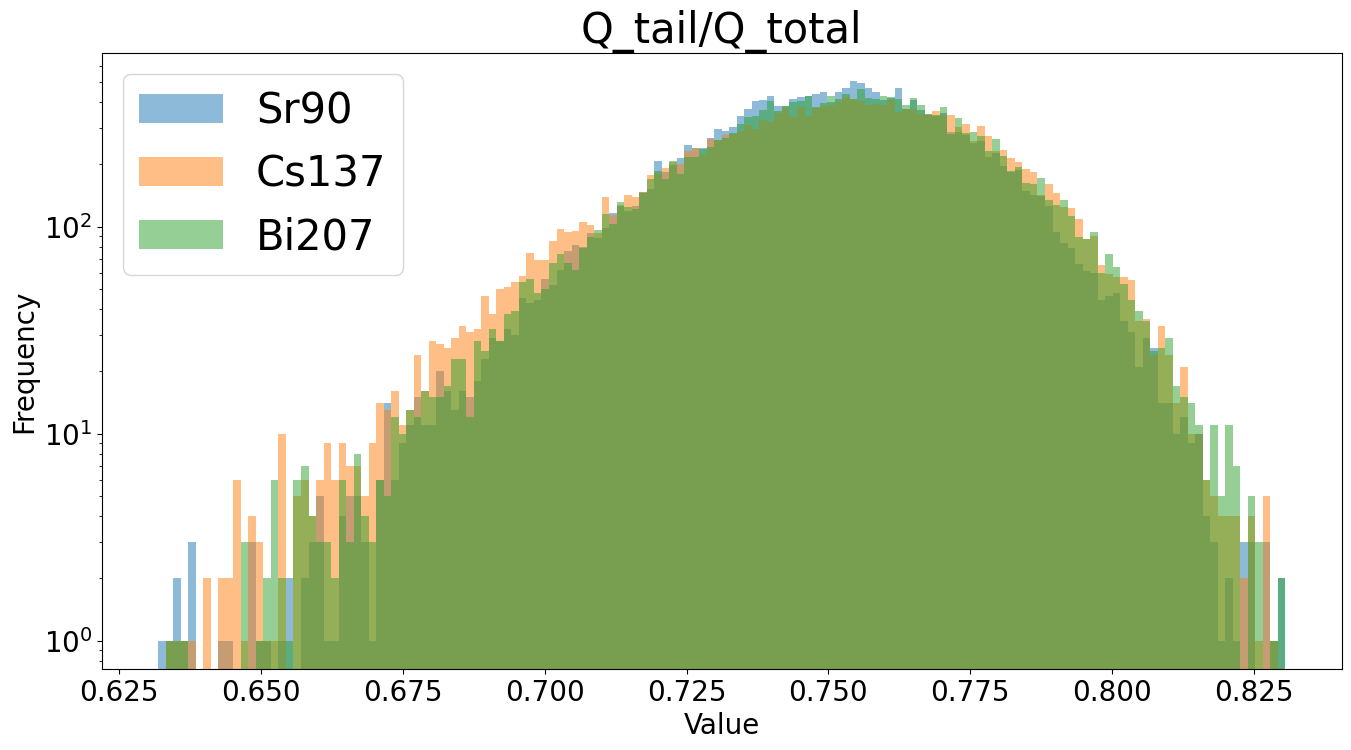

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))

# Find the minimum and maximum values of the array
min = np.amin(Sr90_X[:, 15])
max = np.amax(Sr90_X[:, 15])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 151)
ax.hist(Sr90_X[:, 15], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137_X[:, 15], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207_X[:, 15], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Q_tail/Q_total', fontsize=30)
plt.show()

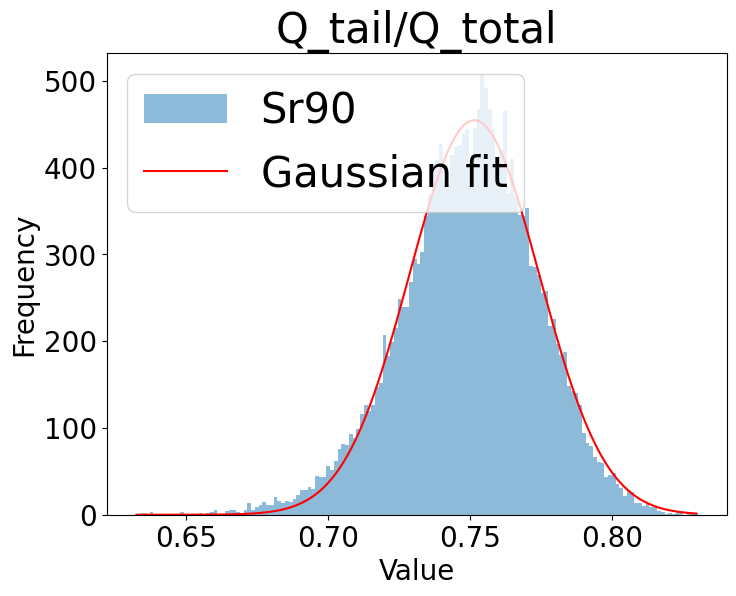

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Define the histogram data
data = Sr90_X[:, 15]

# Find the minimum and maximum values of the data
min_data = np.amin(data)
max_data = np.amax(data)

# Define the bin edges and centers
bin_edges = np.linspace(min_data, max_data, 151)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute the histogram
hist, _ = np.histogram(data, bins=bin_edges)

# Define the initial guesses for the Gaussian parameters
a_guess = np.amax(hist)
x0_guess = data.mean()
sigma_guess = data.std()

# Fit the Gaussian to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[a_guess, x0_guess, sigma_guess])

# Plot the histogram and the fitted Gaussian curve
plt.figure(figsize=(8, 6))
plt.hist(data, bins=bin_edges, alpha=0.5, label='Sr90')
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Gaussian fit')
plt.xlabel('Value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.legend(fontsize=30)
plt.title('Q_tail/Q_total', fontsize=30)
plt.show()



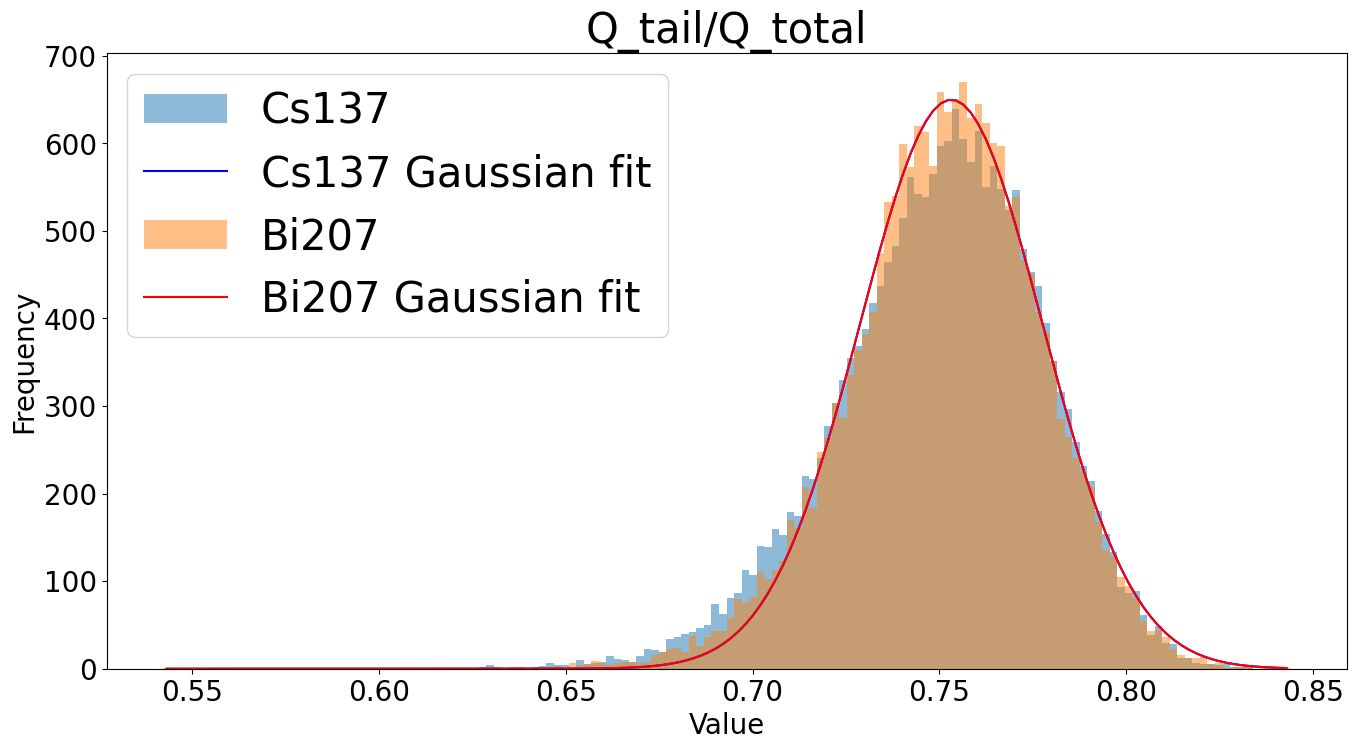

In [20]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Define the histogram data
# data1 = Sr90_X[:, 15]
data2 = Cs137_X[:, 15]
data3 = Bi207_X[:, 15]

# Find the minimum and maximum values of the data
min_data = np.amin(np.concatenate((data1, data2, data3)))
max_data = np.amax(np.concatenate((data1, data2, data3)))

# Define the bin edges and centers
bin_edges = np.linspace(min_data, max_data, 151)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute the histograms
# hist1, _ = np.histogram(data1, bins=bin_edges)
hist2, _ = np.histogram(data2, bins=bin_edges)
hist3, _ = np.histogram(data3, bins=bin_edges)

# Define the initial guesses for the Gaussian parameters
a_guess = np.amax(hist2)
x0_guess = data2.mean()
sigma_guess = data2.std()

# Fit the Gaussian to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, hist2, p0=[a_guess, x0_guess, sigma_guess])

# Plot the histograms and the fitted Gaussian curves
fig, ax = plt.subplots(figsize=(16, 8))
a_guess = np.amax(hist3)
x0_guess = data3.mean()
sigma_guess = data3.std()

popt, pcov = curve_fit(gaussian, bin_centers, hist3, p0=[a_guess, x0_guess, sigma_guess])

ax.hist(data2, bins=bin_edges, alpha=0.5, label='Cs137')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'b-', label='Cs137 Gaussian fit')

ax.hist(data3, bins=bin_edges, alpha=0.5, label='Bi207')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Bi207 Gaussian fit')

ax.set_xlabel('Value', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
# ax.set_yscale('log')
ax.legend(fontsize=30)
ax.set_title('Q_tail/Q_total', fontsize=30)
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Define the histogram data
data = Sr90_X[:, 15]

# Find the minimum and maximum values of the data
min_data = np.amin(data)
max_data = np.amax(data)

# Define the bin edges and centers
bin_edges = np.linspace(min_data, max_data, 151)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute the histogram
hist, _ = np.histogram(data, bins=bin_edges)

# Define the initial guesses for the Gaussian parameters
a_guess = np.amax(hist)
x0_guess = data.mean()
sigma_guess = data.std()

# Fit the Gaussian to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[a_guess, x0_guess, sigma_guess])

# Plot the histogram and the fitted Gaussian curve
plt.figure(figsize=(8, 6))
plt.hist(data, bins=bin_edges, alpha=0.5, label='Sr90')
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Gaussian fit')
plt.xlabel('Value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.legend(fontsize=30)
plt.title('Q_tail/Q_total', fontsize=30)
plt.show()



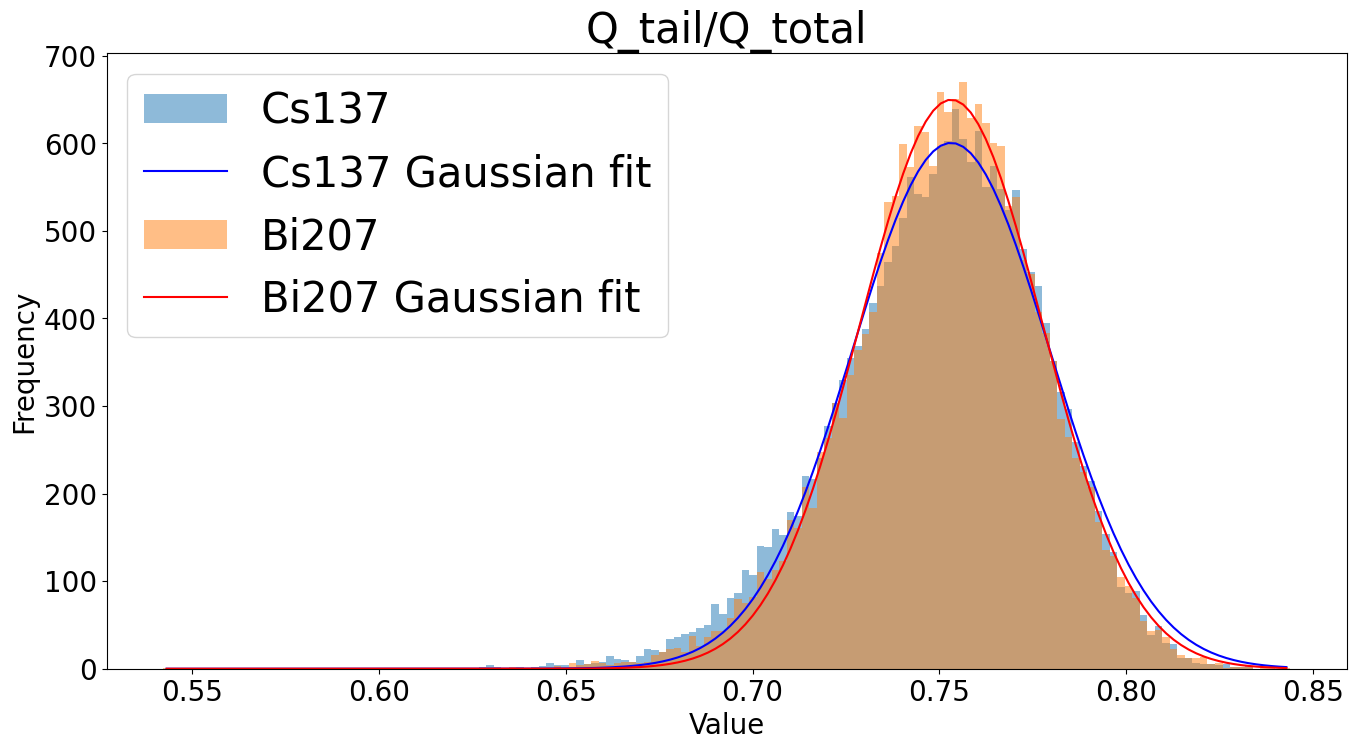

In [23]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Define the histogram data
data1 = Sr90_X[:, 15]
data2 = Cs137_X[:, 15]
data3 = Bi207_X[:, 15]

# Find the minimum and maximum values of the data
min_data = np.amin(np.concatenate((data1, data2, data3)))
max_data = np.amax(np.concatenate((data1, data2, data3)))

# Define the bin edges and centers
bin_edges = np.linspace(min_data, max_data, 151)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute the histograms
hist1, _ = np.histogram(data1, bins=bin_edges)
hist2, _ = np.histogram(data2, bins=bin_edges)
hist3, _ = np.histogram(data3, bins=bin_edges)

# Define the initial guesses for the Gaussian parameters
a_guess = np.amax(hist2)
x0_guess = data2.mean()
sigma_guess = data2.std()

# Fit the Gaussian to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, hist2, p0=[a_guess, x0_guess, sigma_guess])

# Plot the histograms and the fitted Gaussian curves
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(data2, bins=bin_edges, alpha=0.5, label='Cs137')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'b-', label='Cs137 Gaussian fit')

a_guess = np.amax(hist3)
x0_guess = data3.mean()
sigma_guess = data3.std()

popt, pcov = curve_fit(gaussian, bin_centers, hist3, p0=[a_guess, x0_guess, sigma_guess])

ax.hist(data3, bins=bin_edges, alpha=0.5, label='Bi207')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Bi207 Gaussian fit')

ax.set_xlabel('Value', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=30)
ax.set_title('Q_tail/Q_total', fontsize=30)
plt.show()


FWHM of Cs137 Gaussian fitting: 0.060355999999999965
FWHM of Bi207 Gaussian fitting: 0.054320399999999935


<bound method Axes.set of <Axes: >>

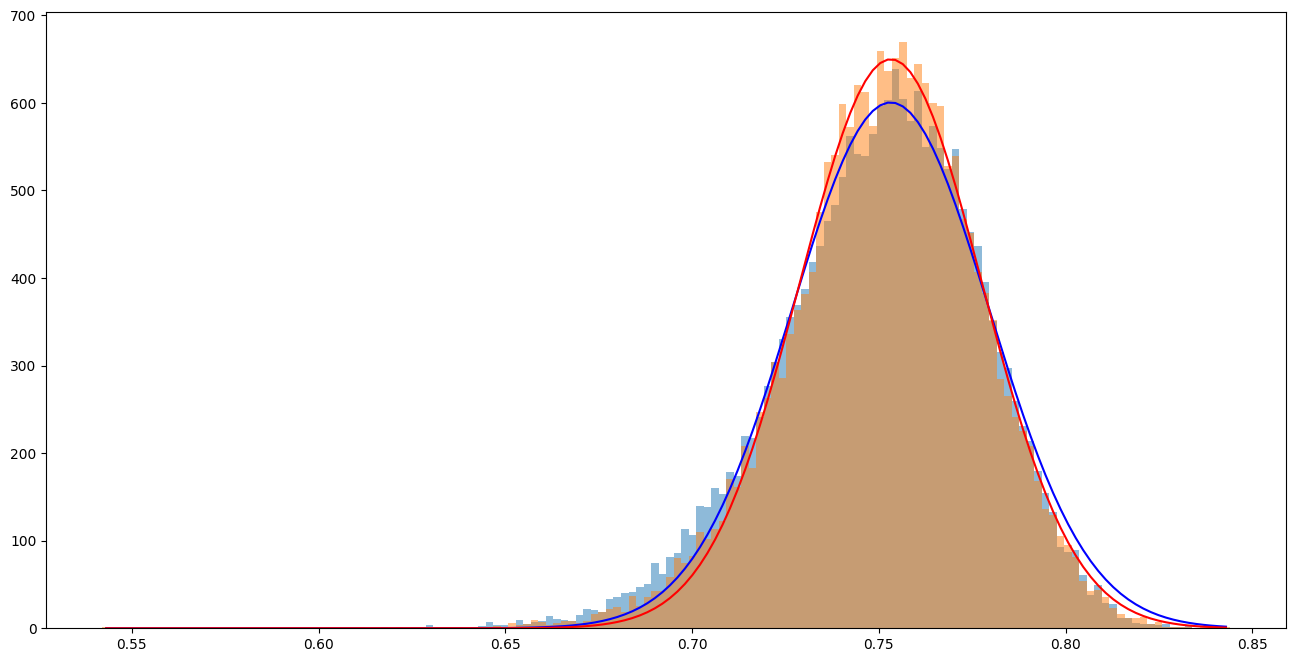

In [24]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Define the histogram data
data1 = Sr90_X[:, 15]
data2 = Cs137_X[:, 15]
data3 = Bi207_X[:, 15]

# Find the minimum and maximum values of the data
min_data = np.amin(np.concatenate((data1, data2, data3)))
max_data = np.amax(np.concatenate((data1, data2, data3)))

# Define the bin edges and centers
bin_edges = np.linspace(min_data, max_data, 151)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute the histograms
hist1, _ = np.histogram(data1, bins=bin_edges)
hist2, _ = np.histogram(data2, bins=bin_edges)
hist3, _ = np.histogram(data3, bins=bin_edges)

# Define the initial guesses for the Gaussian parameters
a_guess = np.amax(hist2)
x0_guess = data2.mean()
sigma_guess = data2.std()

# Fit the Gaussian to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, hist2, p0=[a_guess, x0_guess, sigma_guess])

# Calculate the FWHM of the Gaussian fitting
max_value = np.max(gaussian(bin_centers, *popt))
half_max_value = max_value / 2
half_max_indexes = np.where(gaussian(bin_centers, *popt) >= half_max_value)[0]
fwhm = bin_centers[half_max_indexes[-1]] - bin_centers[half_max_indexes[0]]

# Print the FWHM of the Gaussian fitting
print('FWHM of Cs137 Gaussian fitting:', fwhm)

# Plot the histograms and the fitted Gaussian curves
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(data2, bins=bin_edges, alpha=0.5, label='Cs137')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'b-', label='Cs137 Gaussian fit')

a_guess = np.amax(hist3)
x0_guess = data3.mean()
sigma_guess = data3.std()

popt, pcov = curve_fit(gaussian, bin_centers, hist3, p0=[a_guess, x0_guess, sigma_guess])

# Calculate the FWHM of the Gaussian fitting
max_value = np.max(gaussian(bin_centers, *popt))
half_max_value = max_value / 2
half_max_indexes = np.where(gaussian(bin_centers, *popt) >= half_max_value)[0]
fwhm = bin_centers[half_max_indexes[-1]] - bin_centers[half_max_indexes[0]]

# Print the FWHM of the Gaussian fitting
print('FWHM of Bi207 Gaussian fitting:', fwhm)

ax.hist(data3, bins=bin_edges, alpha=0.5, label='Bi207')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Bi207 Gaussian fit')

ax.set


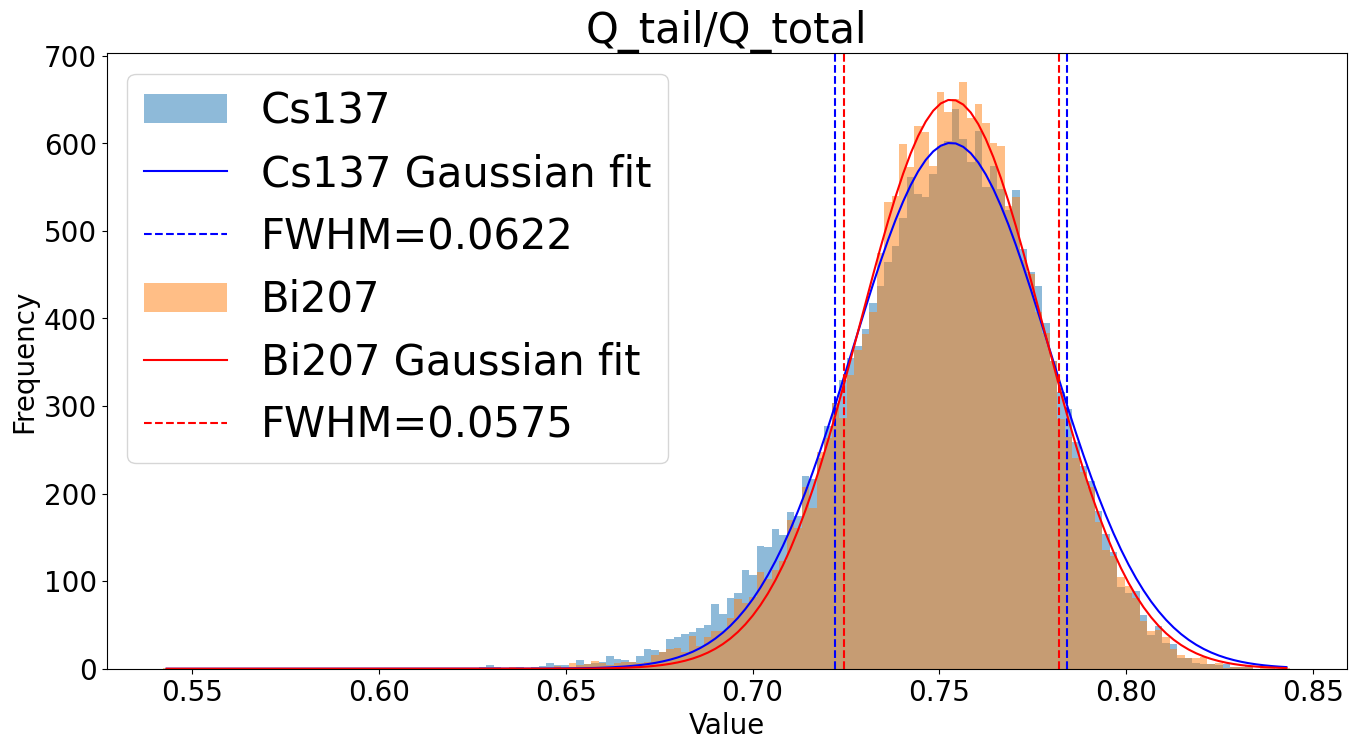

In [26]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Define the histogram data
data1 = Sr90_X[:, 15]
data2 = Cs137_X[:, 15]
data3 = Bi207_X[:, 15]

# Find the minimum and maximum values of the data
min_data = np.amin(np.concatenate((data1, data2, data3)))
max_data = np.amax(np.concatenate((data1, data2, data3)))

# Define the bin edges and centers
bin_edges = np.linspace(min_data, max_data, 151)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute the histograms
hist1, _ = np.histogram(data1, bins=bin_edges)
hist2, _ = np.histogram(data2, bins=bin_edges)
hist3, _ = np.histogram(data3, bins=bin_edges)

# Define the initial guesses for the Gaussian parameters
a_guess = np.amax(hist2)
x0_guess = data2.mean()
sigma_guess = data2.std()

# Fit the Gaussian to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, hist2, p0=[a_guess, x0_guess, sigma_guess])

# Calculate the FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * popt[2]

# Plot the histograms and the fitted Gaussian curves
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(data2, bins=bin_edges, alpha=0.5, label='Cs137')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'b-', label='Cs137 Gaussian fit')
ax.axvline(popt[1] - fwhm / 2, color='b', linestyle='--', label=f'FWHM={fwhm:.4f}')
ax.axvline(popt[1] + fwhm / 2, color='b', linestyle='--')

a_guess = np.amax(hist3)
x0_guess = data3.mean()
sigma_guess = data3.std()

popt, pcov = curve_fit(gaussian, bin_centers, hist3, p0=[a_guess, x0_guess, sigma_guess])

# Calculate the FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * popt[2]

ax.hist(data3, bins=bin_edges, alpha=0.5, label='Bi207')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Bi207 Gaussian fit')
ax.axvline(popt[1] - fwhm / 2, color='r', linestyle='--', label=f'FWHM={fwhm:.4f}')
ax.axvline(popt[1] + fwhm / 2, color='r', linestyle='--')

ax.set_xlabel('Value', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=30)
ax.set_title('Q_tail/Q_total', fontsize=30)
plt.show()


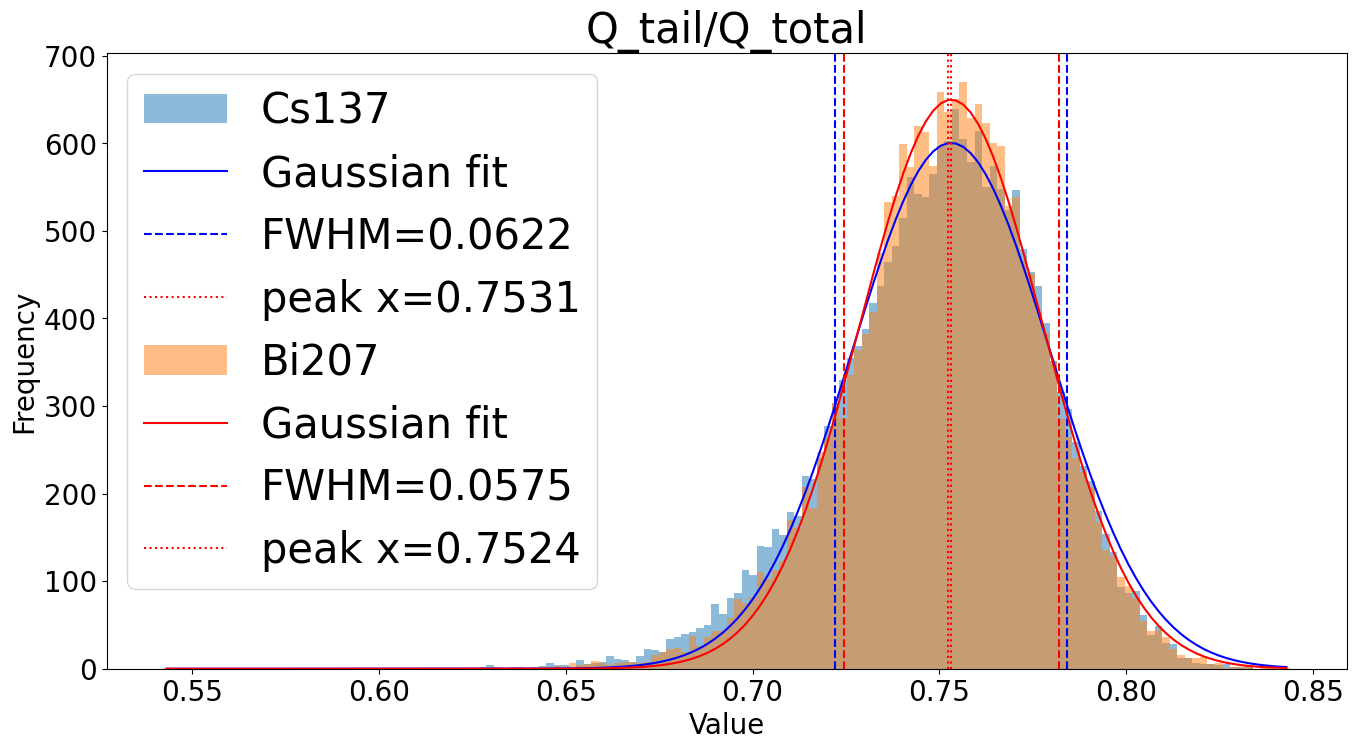

In [32]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Define the histogram data
data1 = Sr90_X[:, 15]
data2 = Cs137_X[:, 15]
data3 = Bi207_X[:, 15]

# Find the minimum and maximum values of the data
min_data = np.amin(np.concatenate((data1, data2, data3)))
max_data = np.amax(np.concatenate((data1, data2, data3)))

# Define the bin edges and centers
bin_edges = np.linspace(min_data, max_data, 151)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute the histograms
hist1, _ = np.histogram(data1, bins=bin_edges)
hist2, _ = np.histogram(data2, bins=bin_edges)
hist3, _ = np.histogram(data3, bins=bin_edges)

# Define the initial guesses for the Gaussian parameters
a_guess = np.amax(hist2)
x0_guess = data2.mean()
sigma_guess = data2.std()

# Fit the Gaussian to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, hist2, p0=[a_guess, x0_guess, sigma_guess])

# Calculate the FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * popt[2]

# Plot the histograms and the fitted Gaussian curves
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(data2, bins=bin_edges, alpha=0.5, label='Cs137')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'b-', label='Gaussian fit')
#ax.axvline(popt[1], color='b', linestyle='-.', label=f'Cs137 peak x={popt[1]:.4f}')
ax.axvline(popt[1] - fwhm / 2, color='b', linestyle='--', label=f'FWHM={fwhm:.4f}')
ax.axvline(popt[1] + fwhm / 2, color='b', linestyle='--')

# Find the x position of the Bi207 peak
cs137_peak_x = popt[1]

# Add a vertical line for the Bi207 peak
ax.axvline(cs137_peak_x, color='r', linestyle=':', label=f'peak x={cs137_peak_x:.4f}')


a_guess = np.amax(hist3)
x0_guess = data3.mean()
sigma_guess = data3.std()

popt, pcov = curve_fit(gaussian, bin_centers, hist3, p0=[a_guess, x0_guess, sigma_guess])

# Calculate the FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * popt[2]

ax.hist(data3, bins=bin_edges, alpha=0.5, label='Bi207')
ax.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Gaussian fit')
ax.axvline(popt[1] - fwhm / 2, color='r', linestyle='--', label=f'FWHM={fwhm:.4f}')
ax.axvline(popt[1] + fwhm / 2, color='r', linestyle='--')

# Find the x position of the Bi207 peak
bi207_peak_x = bin_centers[np.argmax(gaussian(bin_centers, *popt))]

# Add a vertical line for the Bi207 peak
ax.axvline(bi207_peak_x, color='r', linestyle=':', label=f'peak x={bi207_peak_x:.4f}')

# Set the x and y labels and tick sizes
ax.set_xlabel('Value', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

# Add the legend and title
ax.legend(fontsize=30)
ax.set_title('Q_tail/Q_total', fontsize=30)

# Show the plot
plt.show()

FOM = abs(cs137_peak_x-bi207_peak_x)/()
